### Install Required Libraries  
First, we install the necessary packages for training and playing Atari games.

In [1]:
!pip install -q gymnasium
!pip install -q gymnasium[atari,accept-rom-license]
!pip install -q ale-py
!pip install -q stable-baselines3
!pip install -q torch tensorboard opencv-python imageio imageio-ffmpeg matplotlib
!pip install -q autorom[accept-rom-license]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 8.5 MB/s eta 0:00:00ta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.3 MB/s eta 0:00:0000:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kaggle-environments 1.16.11 requires shimmy>=1.2.1, but you have shimmy 0.2.1 which is incompatible.


### 🎮 Atari Games in Reinforcement Learning  
Atari games are widely used in reinforcement learning research as benchmarks for AI agents.  
They provide:
- **High-dimensional visual input** (pixels from the game screen)
- **Complex decision-making challenges**
- **Reward-based learning environment**  

In this notebook, we train an agent to play **Double Dunk**, a basketball game with offensive and defensive strategies.

### 🏀 Creating the Atari Environment (Double Dunk)  
We create an Atari environment using `make_atari_env()`.  
- **Frame stacking** (4 frames) is applied for better state representation.
- **Seed is set** for reproducibility.

In [ ]:
# imports used
import gymnasium as gym
from stable_baselines3 import DQN
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.vec_env import VecFrameStack, VecVideoRecorder
import matplotlib.pyplot as plt
import ale_py 

# Create the DoubleDunk environment
env = make_atari_env("ALE/DoubleDunk-v5", n_envs=1, seed=42)
env = VecFrameStack(env, n_stack=4) 

### Checking Environment Details  
We inspect the observation space, action space, and game-specific information.

In [3]:
# showing important details of the environment
print("===== Environment Details =====")
print(f"Environment ID: {env.envs[0].unwrapped.spec.id}")
print(f"Observation Space: {env.observation_space}")
print(f"Action Space: {env.action_space}")
print(f"Number of Actions: {env.action_space.n}")
print(f"Reward Range: {env.envs[0].unwrapped.reward_range}")  # Print reward range
print(f"Environment Metadata: {env.envs[0].unwrapped.metadata}")

===== Environment Details =====
Environment ID: ALE/DoubleDunk-v5
Observation Space: Box(0, 255, (84, 84, 4), uint8)
Action Space: Discrete(18)
Number of Actions: 18
Reward Range: (-inf, inf)
Environment Metadata: {'render_modes': ['human', 'rgb_array'], 'obs_types': {'grayscale', 'rgb', 'ram'}}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The reward range (-inf, inf) simply means our environment is not limiting rewards. It could be any real number postive or negative to infitinty. 

### Training the DQN Agent  
- **CNN Policy:** Uses convolutional layers to process visual input  
- **Exploration settings:** Adjusted to improve learning  
- **Training for 2M timesteps** (longer training for better performance)

In [4]:
# Wrap the environment to record videos
env = VecVideoRecorder(env, "videos/", record_video_trigger=lambda x: x % 1000 == 0, video_length=1000)

# Define the DQN agent with CNNPolicy
model = DQN(
    "CnnPolicy",
    env,
    verbose=1,
    learning_rate=1e-4,
    buffer_size=100000,
    batch_size=32,
    gamma=0.99,
    exploration_fraction=0.1,
    exploration_final_eps=0.01,
    tensorboard_log="./dqn_doubledunk_tensorboard/",
)

# Train the agent
model.learn(total_timesteps=1_000_000)

Using cuda device
Wrapping the env in a VecTransposeImage.
Logging to ./dqn_doubledunk_tensorboard/DQN_1


/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:335: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/moviepy/config_defaults.py:1: DeprecationWarning: invalid escape sequence '\P'
  """


Saving video to /kaggle/working/videos/rl-video-step-0-to-step-1000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-0-to-step-1000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-0-to-step-1000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-0-to-step-1000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.57e+03 |
|    ep_rew_mean      | -22      |
|    exploration_rate | 0.985    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 220      |
|    time_elapsed     | 7        |
|    total_timesteps  | 1546     |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-2000-to-step-3000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-2000-to-step-3000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-2000-to-step-3000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-2000-to-step-3000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.59e+03 |
|    ep_rew_mean      | -22.8    |
|    exploration_rate | 0.969    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 231      |
|    time_elapsed     | 13       |
|    total_timesteps  | 3134     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.65e+03 |
|    ep_rew_mean      | -23      |
|    exploration_rate | 0.952    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 245      |
|    time_elapsed     | 19       |
|    total_timesteps  | 4891     |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-4000-to-step-5000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-4000-to-step-5000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.62e+03 |
|    ep_rew_mean      | -23      |
|    exploration_rate | 0.937    |
| time/               |          |
|    episodes         | 16       |
|    fps              | 244      |
|    time_elapsed     | 26       |
|    total_timesteps  | 6407     |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-6000-to-step-7000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-6000-to-step-7000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-6000-to-step-7000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-6000-to-step-7000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.65e+03 |
|    ep_rew_mean      | -22.9    |
|    exploration_rate | 0.92     |
| time/               |          |
|    episodes         | 20       |
|    fps              | 244      |
|    time_elapsed     | 33       |
|    total_timesteps  | 8129     |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-8000-to-step-9000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-8000-to-step-9000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-8000-to-step-9000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-8000-to-step-9000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.66e+03 |
|    ep_rew_mean      | -22.8    |
|    exploration_rate | 0.903    |
| time/               |          |
|    episodes         | 24       |
|    fps              | 244      |
|    time_elapsed     | 40       |
|    total_timesteps  | 9832     |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-10000-to-step-11000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-10000-to-step-11000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-10000-to-step-11000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-10000-to-step-11000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.64e+03 |
|    ep_rew_mean      | -22.9    |
|    exploration_rate | 0.887    |
| time/               |          |
|    episodes         | 28       |
|    fps              | 244      |
|    time_elapsed     | 46       |
|    total_timesteps  | 11365    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.62e+03 |
|    ep_rew_mean      | -22.9    |
|    exploration_rate | 0.873    |
| time/               |          |
|    episodes         | 32       |
|    fps              | 247      |
|    time_elapsed     | 51       |
|    total_timesteps  | 12828    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-12000-to-step-13000.mp4
Moviepy - Building video /kaggle/working/videos/rl-vi

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-12000-to-step-13000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.62e+03 |
|    ep_rew_mean      | -23.1    |
|    exploration_rate | 0.857    |
| time/               |          |
|    episodes         | 36       |
|    fps              | 247      |
|    time_elapsed     | 58       |
|    total_timesteps  | 14432    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-14000-to-step-15000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-14000-to-step-15000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-14000-to-step-15000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-14000-to-step-15000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.61e+03 |
|    ep_rew_mean      | -23.1    |
|    exploration_rate | 0.842    |
| time/               |          |
|    episodes         | 40       |
|    fps              | 247      |
|    time_elapsed     | 64       |
|    total_timesteps  | 15924    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-16000-to-step-17000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-16000-to-step-17000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-16000-to-step-17000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-16000-to-step-17000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.62e+03 |
|    ep_rew_mean      | -23      |
|    exploration_rate | 0.825    |
| time/               |          |
|    episodes         | 44       |
|    fps              | 246      |
|    time_elapsed     | 71       |
|    total_timesteps  | 17635    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.6e+03  |
|    ep_rew_mean      | -23      |
|    exploration_rate | 0.812    |
| time/               |          |
|    episodes         | 48       |
|    fps              | 248      |
|    time_elapsed     | 76       |
|    total_timesteps  | 18942    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-18000-to-step-19000.mp4
Moviepy - Building video /kaggle/working/videos/rl-vi

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-18000-to-step-19000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.6e+03  |
|    ep_rew_mean      | -23      |
|    exploration_rate | 0.796    |
| time/               |          |
|    episodes         | 52       |
|    fps              | 248      |
|    time_elapsed     | 82       |
|    total_timesteps  | 20574    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-20000-to-step-21000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-20000-to-step-21000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-20000-to-step-21000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-20000-to-step-21000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.61e+03 |
|    ep_rew_mean      | -23      |
|    exploration_rate | 0.779    |
| time/               |          |
|    episodes         | 56       |
|    fps              | 248      |
|    time_elapsed     | 89       |
|    total_timesteps  | 22320    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-22000-to-step-23000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-22000-to-step-23000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-22000-to-step-23000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-22000-to-step-23000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.62e+03 |
|    ep_rew_mean      | -23      |
|    exploration_rate | 0.763    |
| time/               |          |
|    episodes         | 60       |
|    fps              | 247      |
|    time_elapsed     | 96       |
|    total_timesteps  | 23956    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-24000-to-step-25000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-24000-to-step-25000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-24000-to-step-25000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-24000-to-step-25000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.63e+03 |
|    ep_rew_mean      | -23      |
|    exploration_rate | 0.745    |
| time/               |          |
|    episodes         | 64       |
|    fps              | 247      |
|    time_elapsed     | 104      |
|    total_timesteps  | 25775    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-26000-to-step-27000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-26000-to-step-27000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-26000-to-step-27000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-26000-to-step-27000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.63e+03 |
|    ep_rew_mean      | -22.9    |
|    exploration_rate | 0.73     |
| time/               |          |
|    episodes         | 68       |
|    fps              | 247      |
|    time_elapsed     | 110      |
|    total_timesteps  | 27312    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-28000-to-step-29000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-28000-to-step-29000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-28000-to-step-29000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-28000-to-step-29000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.64e+03 |
|    ep_rew_mean      | -22.9    |
|    exploration_rate | 0.711    |
| time/               |          |
|    episodes         | 72       |
|    fps              | 247      |
|    time_elapsed     | 118      |
|    total_timesteps  | 29224    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.65e+03 |
|    ep_rew_mean      | -23      |
|    exploration_rate | 0.694    |
| time/               |          |
|    episodes         | 76       |
|    fps              | 248      |
|    time_elapsed     | 124      |
|    total_timesteps  | 30911    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-30000-to-step-31000.mp4
Moviepy - Building video /kaggle/working/videos/rl-vi

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-30000-to-step-31000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.65e+03 |
|    ep_rew_mean      | -23      |
|    exploration_rate | 0.678    |
| time/               |          |
|    episodes         | 80       |
|    fps              | 248      |
|    time_elapsed     | 130      |
|    total_timesteps  | 32480    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-32000-to-step-33000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-32000-to-step-33000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-32000-to-step-33000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-32000-to-step-33000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.65e+03 |
|    ep_rew_mean      | -23      |
|    exploration_rate | 0.661    |
| time/               |          |
|    episodes         | 84       |
|    fps              | 247      |
|    time_elapsed     | 138      |
|    total_timesteps  | 34273    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-34000-to-step-35000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-34000-to-step-35000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-34000-to-step-35000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-34000-to-step-35000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.65e+03 |
|    ep_rew_mean      | -22.9    |
|    exploration_rate | 0.646    |
| time/               |          |
|    episodes         | 88       |
|    fps              | 247      |
|    time_elapsed     | 144      |
|    total_timesteps  | 35768    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-36000-to-step-37000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-36000-to-step-37000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-36000-to-step-37000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-36000-to-step-37000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.64e+03 |
|    ep_rew_mean      | -22.9    |
|    exploration_rate | 0.631    |
| time/               |          |
|    episodes         | 92       |
|    fps              | 246      |
|    time_elapsed     | 151      |
|    total_timesteps  | 37293    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.64e+03 |
|    ep_rew_mean      | -22.9    |
|    exploration_rate | 0.616    |
| time/               |          |
|    episodes         | 96       |
|    fps              | 247      |
|    time_elapsed     | 156      |
|    total_timesteps  | 38829    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-38000-to-step-39000.mp4
Moviepy - Building video /kaggle/working/videos/rl-vi

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-38000-to-step-39000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.65e+03 |
|    ep_rew_mean      | -22.9    |
|    exploration_rate | 0.597    |
| time/               |          |
|    episodes         | 100      |
|    fps              | 247      |
|    time_elapsed     | 164      |
|    total_timesteps  | 40660    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-40000-to-step-41000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-40000-to-step-41000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-40000-to-step-41000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-40000-to-step-41000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.65e+03 |
|    ep_rew_mean      | -22.9    |
|    exploration_rate | 0.582    |
| time/               |          |
|    episodes         | 104      |
|    fps              | 247      |
|    time_elapsed     | 170      |
|    total_timesteps  | 42255    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-42000-to-step-43000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-42000-to-step-43000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-42000-to-step-43000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-42000-to-step-43000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.66e+03 |
|    ep_rew_mean      | -22.9    |
|    exploration_rate | 0.564    |
| time/               |          |
|    episodes         | 108      |
|    fps              | 247      |
|    time_elapsed     | 177      |
|    total_timesteps  | 44002    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-44000-to-step-45000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-44000-to-step-45000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-44000-to-step-45000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-44000-to-step-45000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.65e+03 |
|    ep_rew_mean      | -22.9    |
|    exploration_rate | 0.549    |
| time/               |          |
|    episodes         | 112      |
|    fps              | 247      |
|    time_elapsed     | 184      |
|    total_timesteps  | 45602    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-46000-to-step-47000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-46000-to-step-47000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-46000-to-step-47000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-46000-to-step-47000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.65e+03 |
|    ep_rew_mean      | -22.9    |
|    exploration_rate | 0.533    |
| time/               |          |
|    episodes         | 116      |
|    fps              | 246      |
|    time_elapsed     | 191      |
|    total_timesteps  | 47169    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-48000-to-step-49000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-48000-to-step-49000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-48000-to-step-49000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-48000-to-step-49000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.67e+03 |
|    ep_rew_mean      | -23      |
|    exploration_rate | 0.513    |
| time/               |          |
|    episodes         | 120      |
|    fps              | 246      |
|    time_elapsed     | 199      |
|    total_timesteps  | 49222    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.66e+03 |
|    ep_rew_mean      | -23      |
|    exploration_rate | 0.497    |
| time/               |          |
|    episodes         | 124      |
|    fps              | 244      |
|    time_elapsed     | 207      |
|    total_timesteps  | 50762    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0151   |
|    n_updates        | 190      |
-------------------------

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-50000-to-step-51000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.68e+03 |
|    ep_rew_mean      | -23      |
|    exploration_rate | 0.478    |
| time/               |          |
|    episodes         | 128      |
|    fps              | 241      |
|    time_elapsed     | 218      |
|    total_timesteps  | 52739    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00515  |
|    n_updates        | 684      |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-52000-to-step-53000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-52000-to-step-53000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-52000-to-step-53000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-52000-to-step-53000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.69e+03 |
|    ep_rew_mean      | -23      |
|    exploration_rate | 0.461    |
| time/               |          |
|    episodes         | 132      |
|    fps              | 238      |
|    time_elapsed     | 228      |
|    total_timesteps  | 54402    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0129   |
|    n_updates        | 1100     |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-54000-to-step-55000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-54000-to-step-55000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-54000-to-step-55000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-54000-to-step-55000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.69e+03 |
|    ep_rew_mean      | -22.9    |
|    exploration_rate | 0.445    |
| time/               |          |
|    episodes         | 136      |
|    fps              | 235      |
|    time_elapsed     | 238      |
|    total_timesteps  | 56089    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0134   |
|    n_updates        | 1522     |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-56000-to-step-57000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-56000-to-step-57000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-56000-to-step-57000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-56000-to-step-57000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.7e+03  |
|    ep_rew_mean      | -22.9    |
|    exploration_rate | 0.428    |
| time/               |          |
|    episodes         | 140      |
|    fps              | 232      |
|    time_elapsed     | 248      |
|    total_timesteps  | 57796    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0109   |
|    n_updates        | 1948     |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-58000-to-step-59000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-58000-to-step-59000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-58000-to-step-59000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-58000-to-step-59000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.69e+03 |
|    ep_rew_mean      | -22.9    |
|    exploration_rate | 0.414    |
| time/               |          |
|    episodes         | 144      |
|    fps              | 230      |
|    time_elapsed     | 257      |
|    total_timesteps  | 59231    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00583  |
|    n_updates        | 2307     |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-60000-to-step-61000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-60000-to-step-61000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-60000-to-step-61000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-60000-to-step-61000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.71e+03 |
|    ep_rew_mean      | -22.9    |
|    exploration_rate | 0.395    |
| time/               |          |
|    episodes         | 148      |
|    fps              | 228      |
|    time_elapsed     | 268      |
|    total_timesteps  | 61124    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0265   |
|    n_updates        | 2780     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.7e+03  |
|    ep_rew_mean      | -22.9    |
|    exploration_rate | 0.38     |
| time/               |          |
|    episodes         | 152      |
|    fps              | 226      |
|    time_elapsed     | 276      |
|    total_timesteps  | 62613    |
| train/              |  

Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-62000-to-step-63000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.71e+03 |
|    ep_rew_mean      | -23      |
|    exploration_rate | 0.36     |
| time/               |          |
|    episodes         | 156      |
|    fps              | 224      |
|    time_elapsed     | 287      |
|    total_timesteps  | 64599    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0106   |
|    n_updates        | 3649     |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-64000-to-step-65000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-64000-to-step-65000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-64000-to-step-65000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-64000-to-step-65000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.72e+03 |
|    ep_rew_mean      | -23      |
|    exploration_rate | 0.344    |
| time/               |          |
|    episodes         | 160      |
|    fps              | 222      |
|    time_elapsed     | 298      |
|    total_timesteps  | 66305    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0032   |
|    n_updates        | 4076     |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-66000-to-step-67000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-66000-to-step-67000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-66000-to-step-67000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-66000-to-step-67000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.71e+03 |
|    ep_rew_mean      | -23      |
|    exploration_rate | 0.328    |
| time/               |          |
|    episodes         | 164      |
|    fps              | 220      |
|    time_elapsed     | 307      |
|    total_timesteps  | 67878    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0137   |
|    n_updates        | 4469     |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-68000-to-step-69000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-68000-to-step-69000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-68000-to-step-69000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-68000-to-step-69000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.71e+03 |
|    ep_rew_mean      | -23.1    |
|    exploration_rate | 0.311    |
| time/               |          |
|    episodes         | 168      |
|    fps              | 219      |
|    time_elapsed     | 317      |
|    total_timesteps  | 69617    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00582  |
|    n_updates        | 4904     |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-70000-to-step-71000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-70000-to-step-71000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-70000-to-step-71000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-70000-to-step-71000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.72e+03 |
|    ep_rew_mean      | -23.1    |
|    exploration_rate | 0.291    |
| time/               |          |
|    episodes         | 172      |
|    fps              | 217      |
|    time_elapsed     | 329      |
|    total_timesteps  | 71576    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00348  |
|    n_updates        | 5393     |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-72000-to-step-73000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-72000-to-step-73000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-72000-to-step-73000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-72000-to-step-73000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.75e+03 |
|    ep_rew_mean      | -23.1    |
|    exploration_rate | 0.266    |
| time/               |          |
|    episodes         | 176      |
|    fps              | 215      |
|    time_elapsed     | 343      |
|    total_timesteps  | 74091    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00852  |
|    n_updates        | 6022     |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-74000-to-step-75000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-74000-to-step-75000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-74000-to-step-75000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-74000-to-step-75000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.77e+03 |
|    ep_rew_mean      | -23      |
|    exploration_rate | 0.246    |
| time/               |          |
|    episodes         | 180      |
|    fps              | 213      |
|    time_elapsed     | 356      |
|    total_timesteps  | 76196    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00464  |
|    n_updates        | 6548     |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-76000-to-step-77000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-76000-to-step-77000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-76000-to-step-77000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-76000-to-step-77000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.8e+03  |
|    ep_rew_mean      | -23      |
|    exploration_rate | 0.222    |
| time/               |          |
|    episodes         | 184      |
|    fps              | 211      |
|    time_elapsed     | 370      |
|    total_timesteps  | 78625    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.01     |
|    n_updates        | 7156     |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-78000-to-step-79000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-78000-to-step-79000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-78000-to-step-79000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-78000-to-step-79000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.83e+03 |
|    ep_rew_mean      | -23.1    |
|    exploration_rate | 0.199    |
| time/               |          |
|    episodes         | 188      |
|    fps              | 210      |
|    time_elapsed     | 384      |
|    total_timesteps  | 80875    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0147   |
|    n_updates        | 7718     |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-80000-to-step-81000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-80000-to-step-81000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-80000-to-step-81000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-80000-to-step-81000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.83e+03 |
|    ep_rew_mean      | -23.1    |
|    exploration_rate | 0.182    |
| time/               |          |
|    episodes         | 192      |
|    fps              | 209      |
|    time_elapsed     | 394      |
|    total_timesteps  | 82596    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00916  |
|    n_updates        | 8148     |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-82000-to-step-83000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-82000-to-step-83000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-82000-to-step-83000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-82000-to-step-83000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.86e+03 |
|    ep_rew_mean      | -23.1    |
|    exploration_rate | 0.161    |
| time/               |          |
|    episodes         | 196      |
|    fps              | 208      |
|    time_elapsed     | 407      |
|    total_timesteps  | 84751    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0311   |
|    n_updates        | 8687     |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-84000-to-step-85000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-84000-to-step-85000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-84000-to-step-85000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-84000-to-step-85000.mp4
Saving video to /kaggle/working/videos/rl-video-step-86000-to-step-87000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-86000-to-step-87000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-86000-to-step-87000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-86000-to-step-87000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.88e+03 |
|    ep_rew_mean      | -23.2    |
|    exploration_rate | 0.137    |
| time/               |          |
|    episodes         | 200      |
|    fps              | 206      |
|    time_elapsed     | 422      |
|    total_timesteps  | 87146    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0291   |
|    n_updates        | 9286     |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-88000-to-step-89000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-88000-to-step-89000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-88000-to-step-89000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-88000-to-step-89000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.9e+03  |
|    ep_rew_mean      | -23.2    |
|    exploration_rate | 0.117    |
| time/               |          |
|    episodes         | 204      |
|    fps              | 205      |
|    time_elapsed     | 434      |
|    total_timesteps  | 89213    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0173   |
|    n_updates        | 9803     |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-90000-to-step-91000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-90000-to-step-91000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-90000-to-step-91000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-90000-to-step-91000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.93e+03 |
|    ep_rew_mean      | -23.3    |
|    exploration_rate | 0.0926   |
| time/               |          |
|    episodes         | 208      |
|    fps              | 204      |
|    time_elapsed     | 449      |
|    total_timesteps  | 91658    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.002    |
|    n_updates        | 10414    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-92000-to-step-93000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-92000-to-step-93000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-92000-to-step-93000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-92000-to-step-93000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.96e+03 |
|    ep_rew_mean      | -23.3    |
|    exploration_rate | 0.0682   |
| time/               |          |
|    episodes         | 212      |
|    fps              | 202      |
|    time_elapsed     | 464      |
|    total_timesteps  | 94119    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00311  |
|    n_updates        | 11029    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-94000-to-step-95000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-94000-to-step-95000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-94000-to-step-95000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-94000-to-step-95000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.01e+03 |
|    ep_rew_mean      | -23.3    |
|    exploration_rate | 0.0401   |
| time/               |          |
|    episodes         | 216      |
|    fps              | 201      |
|    time_elapsed     | 481      |
|    total_timesteps  | 96958    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0128   |
|    n_updates        | 11739    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-96000-to-step-97000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-96000-to-step-97000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-96000-to-step-97000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-96000-to-step-97000.mp4
Saving video to /kaggle/working/videos/rl-video-step-98000-to-step-99000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-98000-to-step-99000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-98000-to-step-99000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-98000-to-step-99000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.06e+03 |
|    ep_rew_mean      | -23.2    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 220      |
|    fps              | 199      |
|    time_elapsed     | 501      |
|    total_timesteps  | 100093   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0237   |
|    n_updates        | 12523    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-100000-to-step-101000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-100000-to-step-101000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-100000-to-step-101000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-100000-to-step-101000.mp4
Saving video to /kaggle/working/videos/rl-video-step-102000-to-step-103000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-102000-to-step-103000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-102000-to-step-103000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-102000-to-step-103000.mp4
Saving video to /kaggle/working/videos/rl-video-step-104000-to-step-105000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-104000-to-step-105000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-104000-to-step-105000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-104000-to-step-105000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.21e+03 |
|    ep_rew_mean      | -23.2    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 224      |
|    fps              | 197      |
|    time_elapsed     | 533      |
|    total_timesteps  | 105450   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00275  |
|    n_updates        | 13862    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-106000-to-step-107000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-106000-to-step-107000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-106000-to-step-107000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-106000-to-step-107000.mp4
Saving video to /kaggle/working/videos/rl-video-step-108000-to-step-109000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-108000-to-step-109000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-108000-to-step-109000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-108000-to-step-109000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.31e+03 |
|    ep_rew_mean      | -23.3    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 228      |
|    fps              | 196      |
|    time_elapsed     | 560      |
|    total_timesteps  | 109854   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0265   |
|    n_updates        | 14963    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-110000-to-step-111000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-110000-to-step-111000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-110000-to-step-111000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-110000-to-step-111000.mp4
Saving video to /kaggle/working/videos/rl-video-step-112000-to-step-113000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-112000-to-step-113000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-112000-to-step-113000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-112000-to-step-113000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.38e+03 |
|    ep_rew_mean      | -23.3    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 232      |
|    fps              | 194      |
|    time_elapsed     | 581      |
|    total_timesteps  | 113377   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00449  |
|    n_updates        | 15844    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-114000-to-step-115000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-114000-to-step-115000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-114000-to-step-115000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-114000-to-step-115000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.45e+03 |
|    ep_rew_mean      | -23.3    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 236      |
|    fps              | 193      |
|    time_elapsed     | 602      |
|    total_timesteps  | 116903   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0296   |
|    n_updates        | 16725    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-116000-to-step-117000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-116000-to-step-117000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-116000-to-step-117000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-116000-to-step-117000.mp4
Saving video to /kaggle/working/videos/rl-video-step-118000-to-step-119000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-118000-to-step-119000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-118000-to-step-119000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-118000-to-step-119000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.54e+03 |
|    ep_rew_mean      | -23.3    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 240      |
|    fps              | 192      |
|    time_elapsed     | 626      |
|    total_timesteps  | 120807   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00763  |
|    n_updates        | 17701    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-120000-to-step-121000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-120000-to-step-121000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-120000-to-step-121000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-120000-to-step-121000.mp4
Saving video to /kaggle/working/videos/rl-video-step-122000-to-step-123000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-122000-to-step-123000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-122000-to-step-123000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-122000-to-step-123000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.61e+03 |
|    ep_rew_mean      | -23.4    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 244      |
|    fps              | 192      |
|    time_elapsed     | 645      |
|    total_timesteps  | 123958   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0212   |
|    n_updates        | 18489    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-124000-to-step-125000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-124000-to-step-125000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-124000-to-step-125000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-124000-to-step-125000.mp4
Saving video to /kaggle/working/videos/rl-video-step-126000-to-step-127000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-126000-to-step-127000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-126000-to-step-127000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-126000-to-step-127000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.7e+03  |
|    ep_rew_mean      | -23.4    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 248      |
|    fps              | 191      |
|    time_elapsed     | 670      |
|    total_timesteps  | 128033   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00444  |
|    n_updates        | 19508    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-128000-to-step-129000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-128000-to-step-129000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-128000-to-step-129000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-128000-to-step-129000.mp4
Saving video to /kaggle/working/videos/rl-video-step-130000-to-step-131000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-130000-to-step-131000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-130000-to-step-131000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-130000-to-step-131000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.76e+03 |
|    ep_rew_mean      | -23.4    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 252      |
|    fps              | 190      |
|    time_elapsed     | 688      |
|    total_timesteps  | 131059   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0159   |
|    n_updates        | 20264    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-132000-to-step-133000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-132000-to-step-133000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-132000-to-step-133000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-132000-to-step-133000.mp4
Saving video to /kaggle/working/videos/rl-video-step-134000-to-step-135000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-134000-to-step-135000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-134000-to-step-135000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-134000-to-step-135000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.89e+03 |
|    ep_rew_mean      | -23.3    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 256      |
|    fps              | 189      |
|    time_elapsed     | 719      |
|    total_timesteps  | 136325   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00438  |
|    n_updates        | 21581    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-136000-to-step-137000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-136000-to-step-137000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-136000-to-step-137000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-136000-to-step-137000.mp4
Saving video to /kaggle/working/videos/rl-video-step-138000-to-step-139000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-138000-to-step-139000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-138000-to-step-139000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-138000-to-step-139000.mp4
Saving video to /kaggle/working/videos/rl-video-step-140000-to-step-141000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-140000-to-step-141000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-140000-to-step-141000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-140000-to-step-141000.mp4
Saving video to /kaggle/working/videos/rl-video-step-142000-to-step-143000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-142000-to-step-143000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-142000-to-step-143000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-142000-to-step-143000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.1e+03  |
|    ep_rew_mean      | -23.3    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 260      |
|    fps              | 188      |
|    time_elapsed     | 761      |
|    total_timesteps  | 143182   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00909  |
|    n_updates        | 23295    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-144000-to-step-145000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-144000-to-step-145000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-144000-to-step-145000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-144000-to-step-145000.mp4
Saving video to /kaggle/working/videos/rl-video-step-146000-to-step-147000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-146000-to-step-147000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-146000-to-step-147000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-146000-to-step-147000.mp4
Saving video to /kaggle/working/videos/rl-video-step-148000-to-step-149000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-148000-to-step-149000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-148000-to-step-149000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-148000-to-step-149000.mp4
Saving video to /kaggle/working/videos/rl-video-step-150000-to-step-151000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-150000-to-step-151000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-150000-to-step-151000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-150000-to-step-151000.mp4
Saving video to /kaggle/working/videos/rl-video-step-152000-to-step-153000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-152000-to-step-153000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-152000-to-step-153000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-152000-to-step-153000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.45e+03 |
|    ep_rew_mean      | -23.4    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 264      |
|    fps              | 186      |
|    time_elapsed     | 823      |
|    total_timesteps  | 153542   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00877  |
|    n_updates        | 25885    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-154000-to-step-155000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-154000-to-step-155000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-154000-to-step-155000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-154000-to-step-155000.mp4
Saving video to /kaggle/working/videos/rl-video-step-156000-to-step-157000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-156000-to-step-157000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-156000-to-step-157000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-156000-to-step-157000.mp4
Saving video to /kaggle/working/videos/rl-video-step-158000-to-step-159000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-158000-to-step-159000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-158000-to-step-159000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-158000-to-step-159000.mp4
Saving video to /kaggle/working/videos/rl-video-step-160000-to-step-161000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-160000-to-step-161000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-160000-to-step-161000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-160000-to-step-161000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.69e+03 |
|    ep_rew_mean      | -23.4    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 268      |
|    fps              | 185      |
|    time_elapsed     | 869      |
|    total_timesteps  | 161207   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0127   |
|    n_updates        | 27801    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-162000-to-step-163000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-162000-to-step-163000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-162000-to-step-163000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-162000-to-step-163000.mp4
Saving video to /kaggle/working/videos/rl-video-step-164000-to-step-165000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-164000-to-step-165000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-164000-to-step-165000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-164000-to-step-165000.mp4
Saving video to /kaggle/working/videos/rl-video-step-166000-to-step-167000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-166000-to-step-167000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-166000-to-step-167000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-166000-to-step-167000.mp4
Saving video to /kaggle/working/videos/rl-video-step-168000-to-step-169000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-168000-to-step-169000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-168000-to-step-169000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-168000-to-step-169000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.98e+03 |
|    ep_rew_mean      | -23.5    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 272      |
|    fps              | 184      |
|    time_elapsed     | 924      |
|    total_timesteps  | 170453   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00848  |
|    n_updates        | 30113    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-170000-to-step-171000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-170000-to-step-171000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-170000-to-step-171000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-170000-to-step-171000.mp4
Saving video to /kaggle/working/videos/rl-video-step-172000-to-step-173000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-172000-to-step-173000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-172000-to-step-173000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-172000-to-step-173000.mp4
Saving video to /kaggle/working/videos/rl-video-step-174000-to-step-175000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-174000-to-step-175000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-174000-to-step-175000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-174000-to-step-175000.mp4
Saving video to /kaggle/working/videos/rl-video-step-176000-to-step-177000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-176000-to-step-177000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-176000-to-step-177000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-176000-to-step-177000.mp4
Saving video to /kaggle/working/videos/rl-video-step-178000-to-step-179000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-178000-to-step-179000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-178000-to-step-179000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-178000-to-step-179000.mp4
Saving video to /kaggle/working/videos/rl-video-step-180000-to-step-181000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-180000-to-step-181000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-180000-to-step-181000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-180000-to-step-181000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.36e+03 |
|    ep_rew_mean      | -23.5    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 276      |
|    fps              | 183      |
|    time_elapsed     | 996      |
|    total_timesteps  | 182645   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00882  |
|    n_updates        | 33161    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-182000-to-step-183000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-182000-to-step-183000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-182000-to-step-183000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-182000-to-step-183000.mp4
Saving video to /kaggle/working/videos/rl-video-step-184000-to-step-185000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-184000-to-step-185000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-184000-to-step-185000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-184000-to-step-185000.mp4
Saving video to /kaggle/working/videos/rl-video-step-186000-to-step-187000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-186000-to-step-187000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-186000-to-step-187000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-186000-to-step-187000.mp4
Saving video to /kaggle/working/videos/rl-video-step-188000-to-step-189000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-188000-to-step-189000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-188000-to-step-189000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-188000-to-step-189000.mp4
Saving video to /kaggle/working/videos/rl-video-step-190000-to-step-191000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-190000-to-step-191000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-190000-to-step-191000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-190000-to-step-191000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.61e+03 |
|    ep_rew_mean      | -23.5    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 280      |
|    fps              | 182      |
|    time_elapsed     | 1046     |
|    total_timesteps  | 191003   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00144  |
|    n_updates        | 35250    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-192000-to-step-193000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-192000-to-step-193000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-192000-to-step-193000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-192000-to-step-193000.mp4
Saving video to /kaggle/working/videos/rl-video-step-194000-to-step-195000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-194000-to-step-195000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-194000-to-step-195000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-194000-to-step-195000.mp4
Saving video to /kaggle/working/videos/rl-video-step-196000-to-step-197000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-196000-to-step-197000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-196000-to-step-197000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-196000-to-step-197000.mp4
Saving video to /kaggle/working/videos/rl-video-step-198000-to-step-199000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-198000-to-step-199000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-198000-to-step-199000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-198000-to-step-199000.mp4
Saving video to /kaggle/working/videos/rl-video-step-200000-to-step-201000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-200000-to-step-201000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-200000-to-step-201000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-200000-to-step-201000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.98e+03 |
|    ep_rew_mean      | -23.5    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 284      |
|    fps              | 181      |
|    time_elapsed     | 1115     |
|    total_timesteps  | 202679   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0175   |
|    n_updates        | 38169    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-202000-to-step-203000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-202000-to-step-203000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-202000-to-step-203000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-202000-to-step-203000.mp4
Saving video to /kaggle/working/videos/rl-video-step-204000-to-step-205000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-204000-to-step-205000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-204000-to-step-205000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-204000-to-step-205000.mp4
Saving video to /kaggle/working/videos/rl-video-step-206000-to-step-207000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-206000-to-step-207000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-206000-to-step-207000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-206000-to-step-207000.mp4
Saving video to /kaggle/working/videos/rl-video-step-208000-to-step-209000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-208000-to-step-209000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-208000-to-step-209000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-208000-to-step-209000.mp4
Saving video to /kaggle/working/videos/rl-video-step-210000-to-step-211000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-210000-to-step-211000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-210000-to-step-211000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-210000-to-step-211000.mp4
Saving video to /kaggle/working/videos/rl-video-step-212000-to-step-213000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-212000-to-step-213000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-212000-to-step-213000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-212000-to-step-213000.mp4
Saving video to /kaggle/working/videos/rl-video-step-214000-to-step-215000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-214000-to-step-215000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-214000-to-step-215000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-214000-to-step-215000.mp4
Saving video to /kaggle/working/videos/rl-video-step-216000-to-step-217000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-216000-to-step-217000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-216000-to-step-217000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-216000-to-step-217000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.54e+03 |
|    ep_rew_mean      | -23.5    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 288      |
|    fps              | 180      |
|    time_elapsed     | 1210     |
|    total_timesteps  | 218870   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00191  |
|    n_updates        | 42217    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-218000-to-step-219000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-218000-to-step-219000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-218000-to-step-219000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-218000-to-step-219000.mp4
Saving video to /kaggle/working/videos/rl-video-step-220000-to-step-221000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-220000-to-step-221000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-220000-to-step-221000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-220000-to-step-221000.mp4
Saving video to /kaggle/working/videos/rl-video-step-222000-to-step-223000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-222000-to-step-223000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-222000-to-step-223000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-222000-to-step-223000.mp4
Saving video to /kaggle/working/videos/rl-video-step-224000-to-step-225000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-224000-to-step-225000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-224000-to-step-225000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-224000-to-step-225000.mp4
Saving video to /kaggle/working/videos/rl-video-step-226000-to-step-227000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-226000-to-step-227000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-226000-to-step-227000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-226000-to-step-227000.mp4
Saving video to /kaggle/working/videos/rl-video-step-228000-to-step-229000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-228000-to-step-229000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-228000-to-step-229000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-228000-to-step-229000.mp4
Saving video to /kaggle/working/videos/rl-video-step-230000-to-step-231000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-230000-to-step-231000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-230000-to-step-231000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-230000-to-step-231000.mp4
Saving video to /kaggle/working/videos/rl-video-step-232000-to-step-233000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-232000-to-step-233000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-232000-to-step-233000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-232000-to-step-233000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.08e+03 |
|    ep_rew_mean      | -23.6    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 292      |
|    fps              | 179      |
|    time_elapsed     | 1300     |
|    total_timesteps  | 234066   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00227  |
|    n_updates        | 46016    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-234000-to-step-235000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-234000-to-step-235000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-234000-to-step-235000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-234000-to-step-235000.mp4
Saving video to /kaggle/working/videos/rl-video-step-236000-to-step-237000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-236000-to-step-237000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-236000-to-step-237000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-236000-to-step-237000.mp4
Saving video to /kaggle/working/videos/rl-video-step-238000-to-step-239000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-238000-to-step-239000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-238000-to-step-239000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-238000-to-step-239000.mp4
Saving video to /kaggle/working/videos/rl-video-step-240000-to-step-241000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-240000-to-step-241000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-240000-to-step-241000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-240000-to-step-241000.mp4
Saving video to /kaggle/working/videos/rl-video-step-242000-to-step-243000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-242000-to-step-243000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-242000-to-step-243000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-242000-to-step-243000.mp4
Saving video to /kaggle/working/videos/rl-video-step-244000-to-step-245000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-244000-to-step-245000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-244000-to-step-245000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-244000-to-step-245000.mp4
Saving video to /kaggle/working/videos/rl-video-step-246000-to-step-247000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-246000-to-step-247000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-246000-to-step-247000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-246000-to-step-247000.mp4
Saving video to /kaggle/working/videos/rl-video-step-248000-to-step-249000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-248000-to-step-249000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-248000-to-step-249000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-248000-to-step-249000.mp4
Saving video to /kaggle/working/videos/rl-video-step-250000-to-step-251000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-250000-to-step-251000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-250000-to-step-251000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-250000-to-step-251000.mp4
Saving video to /kaggle/working/videos/rl-video-step-252000-to-step-253000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-252000-to-step-253000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-252000-to-step-253000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-252000-to-step-253000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.77e+03 |
|    ep_rew_mean      | -23.6    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 296      |
|    fps              | 178      |
|    time_elapsed     | 1415     |
|    total_timesteps  | 253380   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000392 |
|    n_updates        | 50844    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-254000-to-step-255000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-254000-to-step-255000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-254000-to-step-255000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-254000-to-step-255000.mp4
Saving video to /kaggle/working/videos/rl-video-step-256000-to-step-257000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-256000-to-step-257000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-256000-to-step-257000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-256000-to-step-257000.mp4
Saving video to /kaggle/working/videos/rl-video-step-258000-to-step-259000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-258000-to-step-259000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-258000-to-step-259000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-258000-to-step-259000.mp4
Saving video to /kaggle/working/videos/rl-video-step-260000-to-step-261000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-260000-to-step-261000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-260000-to-step-261000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-260000-to-step-261000.mp4
Saving video to /kaggle/working/videos/rl-video-step-262000-to-step-263000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-262000-to-step-263000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-262000-to-step-263000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-262000-to-step-263000.mp4
Saving video to /kaggle/working/videos/rl-video-step-264000-to-step-265000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-264000-to-step-265000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-264000-to-step-265000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-264000-to-step-265000.mp4
Saving video to /kaggle/working/videos/rl-video-step-266000-to-step-267000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-266000-to-step-267000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-266000-to-step-267000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-266000-to-step-267000.mp4
Saving video to /kaggle/working/videos/rl-video-step-268000-to-step-269000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-268000-to-step-269000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-268000-to-step-269000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-268000-to-step-269000.mp4
Saving video to /kaggle/working/videos/rl-video-step-270000-to-step-271000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-270000-to-step-271000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-270000-to-step-271000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-270000-to-step-271000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.4e+03  |
|    ep_rew_mean      | -23.6    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 300      |
|    fps              | 178      |
|    time_elapsed     | 1522     |
|    total_timesteps  | 271488   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000261 |
|    n_updates        | 55371    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-272000-to-step-273000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-272000-to-step-273000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-272000-to-step-273000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-272000-to-step-273000.mp4
Saving video to /kaggle/working/videos/rl-video-step-274000-to-step-275000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-274000-to-step-275000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-274000-to-step-275000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-274000-to-step-275000.mp4
Saving video to /kaggle/working/videos/rl-video-step-276000-to-step-277000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-276000-to-step-277000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-276000-to-step-277000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-276000-to-step-277000.mp4
Saving video to /kaggle/working/videos/rl-video-step-278000-to-step-279000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-278000-to-step-279000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-278000-to-step-279000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-278000-to-step-279000.mp4
Saving video to /kaggle/working/videos/rl-video-step-280000-to-step-281000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-280000-to-step-281000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-280000-to-step-281000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-280000-to-step-281000.mp4
Saving video to /kaggle/working/videos/rl-video-step-282000-to-step-283000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-282000-to-step-283000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-282000-to-step-283000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-282000-to-step-283000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.84e+03 |
|    ep_rew_mean      | -23.6    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 304      |
|    fps              | 177      |
|    time_elapsed     | 1600     |
|    total_timesteps  | 284761   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00021  |
|    n_updates        | 58690    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-284000-to-step-285000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-284000-to-step-285000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-284000-to-step-285000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-284000-to-step-285000.mp4
Saving video to /kaggle/working/videos/rl-video-step-286000-to-step-287000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-286000-to-step-287000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-286000-to-step-287000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-286000-to-step-287000.mp4
Saving video to /kaggle/working/videos/rl-video-step-288000-to-step-289000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-288000-to-step-289000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-288000-to-step-289000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-288000-to-step-289000.mp4
Saving video to /kaggle/working/videos/rl-video-step-290000-to-step-291000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-290000-to-step-291000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-290000-to-step-291000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-290000-to-step-291000.mp4
Saving video to /kaggle/working/videos/rl-video-step-292000-to-step-293000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-292000-to-step-293000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-292000-to-step-293000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-292000-to-step-293000.mp4
Saving video to /kaggle/working/videos/rl-video-step-294000-to-step-295000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-294000-to-step-295000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-294000-to-step-295000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-294000-to-step-295000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.2e+03  |
|    ep_rew_mean      | -23.6    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 308      |
|    fps              | 177      |
|    time_elapsed     | 1668     |
|    total_timesteps  | 296110   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000191 |
|    n_updates        | 61527    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-296000-to-step-297000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-296000-to-step-297000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-296000-to-step-297000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-296000-to-step-297000.mp4
Saving video to /kaggle/working/videos/rl-video-step-298000-to-step-299000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-298000-to-step-299000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-298000-to-step-299000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-298000-to-step-299000.mp4
Saving video to /kaggle/working/videos/rl-video-step-300000-to-step-301000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-300000-to-step-301000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-300000-to-step-301000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-300000-to-step-301000.mp4
Saving video to /kaggle/working/videos/rl-video-step-302000-to-step-303000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-302000-to-step-303000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-302000-to-step-303000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-302000-to-step-303000.mp4
Saving video to /kaggle/working/videos/rl-video-step-304000-to-step-305000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-304000-to-step-305000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-304000-to-step-305000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-304000-to-step-305000.mp4
Saving video to /kaggle/working/videos/rl-video-step-306000-to-step-307000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-306000-to-step-307000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-306000-to-step-307000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-306000-to-step-307000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.61e+03 |
|    ep_rew_mean      | -23.6    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 312      |
|    fps              | 177      |
|    time_elapsed     | 1742     |
|    total_timesteps  | 308700   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000113 |
|    n_updates        | 64674    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-308000-to-step-309000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-308000-to-step-309000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-308000-to-step-309000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-308000-to-step-309000.mp4
Saving video to /kaggle/working/videos/rl-video-step-310000-to-step-311000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-310000-to-step-311000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-310000-to-step-311000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-310000-to-step-311000.mp4
Saving video to /kaggle/working/videos/rl-video-step-312000-to-step-313000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-312000-to-step-313000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-312000-to-step-313000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-312000-to-step-313000.mp4
Saving video to /kaggle/working/videos/rl-video-step-314000-to-step-315000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-314000-to-step-315000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-314000-to-step-315000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-314000-to-step-315000.mp4
Saving video to /kaggle/working/videos/rl-video-step-316000-to-step-317000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-316000-to-step-317000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-316000-to-step-317000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-316000-to-step-317000.mp4
Saving video to /kaggle/working/videos/rl-video-step-318000-to-step-319000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-318000-to-step-319000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-318000-to-step-319000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-318000-to-step-319000.mp4
Saving video to /kaggle/working/videos/rl-video-step-320000-to-step-321000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-320000-to-step-321000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-320000-to-step-321000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-320000-to-step-321000.mp4
Saving video to /kaggle/working/videos/rl-video-step-322000-to-step-323000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-322000-to-step-323000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-322000-to-step-323000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-322000-to-step-323000.mp4
Saving video to /kaggle/working/videos/rl-video-step-324000-to-step-325000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-324000-to-step-325000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-324000-to-step-325000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-324000-to-step-325000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.2e+03  |
|    ep_rew_mean      | -23.5    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 316      |
|    fps              | 176      |
|    time_elapsed     | 1849     |
|    total_timesteps  | 326465   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00137  |
|    n_updates        | 69116    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-326000-to-step-327000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-326000-to-step-327000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-326000-to-step-327000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-326000-to-step-327000.mp4
Saving video to /kaggle/working/videos/rl-video-step-328000-to-step-329000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-328000-to-step-329000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-328000-to-step-329000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-328000-to-step-329000.mp4
Saving video to /kaggle/working/videos/rl-video-step-330000-to-step-331000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-330000-to-step-331000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-330000-to-step-331000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-330000-to-step-331000.mp4
Saving video to /kaggle/working/videos/rl-video-step-332000-to-step-333000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-332000-to-step-333000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-332000-to-step-333000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-332000-to-step-333000.mp4
Saving video to /kaggle/working/videos/rl-video-step-334000-to-step-335000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-334000-to-step-335000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-334000-to-step-335000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-334000-to-step-335000.mp4
Saving video to /kaggle/working/videos/rl-video-step-336000-to-step-337000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-336000-to-step-337000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-336000-to-step-337000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-336000-to-step-337000.mp4
Saving video to /kaggle/working/videos/rl-video-step-338000-to-step-339000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-338000-to-step-339000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-338000-to-step-339000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-338000-to-step-339000.mp4
Saving video to /kaggle/working/videos/rl-video-step-340000-to-step-341000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-340000-to-step-341000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-340000-to-step-341000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-340000-to-step-341000.mp4
Saving video to /kaggle/working/videos/rl-video-step-342000-to-step-343000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-342000-to-step-343000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-342000-to-step-343000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-342000-to-step-343000.mp4
Saving video to /kaggle/working/videos/rl-video-step-344000-to-step-345000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-344000-to-step-345000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-344000-to-step-345000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-344000-to-step-345000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.86e+03 |
|    ep_rew_mean      | -23.5    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 320      |
|    fps              | 175      |
|    time_elapsed     | 1966     |
|    total_timesteps  | 345953   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.42e-05 |
|    n_updates        | 73988    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-346000-to-step-347000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-346000-to-step-347000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-346000-to-step-347000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-346000-to-step-347000.mp4
Saving video to /kaggle/working/videos/rl-video-step-348000-to-step-349000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-348000-to-step-349000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-348000-to-step-349000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-348000-to-step-349000.mp4
Saving video to /kaggle/working/videos/rl-video-step-350000-to-step-351000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-350000-to-step-351000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-350000-to-step-351000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-350000-to-step-351000.mp4
Saving video to /kaggle/working/videos/rl-video-step-352000-to-step-353000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-352000-to-step-353000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-352000-to-step-353000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-352000-to-step-353000.mp4
Saving video to /kaggle/working/videos/rl-video-step-354000-to-step-355000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-354000-to-step-355000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-354000-to-step-355000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-354000-to-step-355000.mp4
Saving video to /kaggle/working/videos/rl-video-step-356000-to-step-357000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-356000-to-step-357000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-356000-to-step-357000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-356000-to-step-357000.mp4
Saving video to /kaggle/working/videos/rl-video-step-358000-to-step-359000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-358000-to-step-359000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-358000-to-step-359000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-358000-to-step-359000.mp4
Saving video to /kaggle/working/videos/rl-video-step-360000-to-step-361000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-360000-to-step-361000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-360000-to-step-361000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-360000-to-step-361000.mp4
Saving video to /kaggle/working/videos/rl-video-step-362000-to-step-363000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-362000-to-step-363000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-362000-to-step-363000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-362000-to-step-363000.mp4
Saving video to /kaggle/working/videos/rl-video-step-364000-to-step-365000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-364000-to-step-365000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-364000-to-step-365000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-364000-to-step-365000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.05e+04 |
|    ep_rew_mean      | -23.6    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 324      |
|    fps              | 175      |
|    time_elapsed     | 2092     |
|    total_timesteps  | 366713   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000329 |
|    n_updates        | 79178    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-366000-to-step-367000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-366000-to-step-367000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-366000-to-step-367000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-366000-to-step-367000.mp4
Saving video to /kaggle/working/videos/rl-video-step-368000-to-step-369000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-368000-to-step-369000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-368000-to-step-369000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-368000-to-step-369000.mp4
Saving video to /kaggle/working/videos/rl-video-step-370000-to-step-371000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-370000-to-step-371000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-370000-to-step-371000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-370000-to-step-371000.mp4
Saving video to /kaggle/working/videos/rl-video-step-372000-to-step-373000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-372000-to-step-373000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-372000-to-step-373000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-372000-to-step-373000.mp4
Saving video to /kaggle/working/videos/rl-video-step-374000-to-step-375000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-374000-to-step-375000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-374000-to-step-375000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-374000-to-step-375000.mp4
Saving video to /kaggle/working/videos/rl-video-step-376000-to-step-377000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-376000-to-step-377000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-376000-to-step-377000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-376000-to-step-377000.mp4
Saving video to /kaggle/working/videos/rl-video-step-378000-to-step-379000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-378000-to-step-379000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-378000-to-step-379000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-378000-to-step-379000.mp4
Saving video to /kaggle/working/videos/rl-video-step-380000-to-step-381000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-380000-to-step-381000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-380000-to-step-381000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-380000-to-step-381000.mp4
Saving video to /kaggle/working/videos/rl-video-step-382000-to-step-383000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-382000-to-step-383000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-382000-to-step-383000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-382000-to-step-383000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.1e+04  |
|    ep_rew_mean      | -23.5    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 328      |
|    fps              | 174      |
|    time_elapsed     | 2192     |
|    total_timesteps  | 383030   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000373 |
|    n_updates        | 83257    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-384000-to-step-385000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-384000-to-step-385000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-384000-to-step-385000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-384000-to-step-385000.mp4
Saving video to /kaggle/working/videos/rl-video-step-386000-to-step-387000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-386000-to-step-387000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-386000-to-step-387000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-386000-to-step-387000.mp4
Saving video to /kaggle/working/videos/rl-video-step-388000-to-step-389000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-388000-to-step-389000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-388000-to-step-389000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-388000-to-step-389000.mp4
Saving video to /kaggle/working/videos/rl-video-step-390000-to-step-391000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-390000-to-step-391000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-390000-to-step-391000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-390000-to-step-391000.mp4
Saving video to /kaggle/working/videos/rl-video-step-392000-to-step-393000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-392000-to-step-393000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-392000-to-step-393000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-392000-to-step-393000.mp4
Saving video to /kaggle/working/videos/rl-video-step-394000-to-step-395000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-394000-to-step-395000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-394000-to-step-395000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-394000-to-step-395000.mp4
Saving video to /kaggle/working/videos/rl-video-step-396000-to-step-397000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-396000-to-step-397000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-396000-to-step-397000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-396000-to-step-397000.mp4
Saving video to /kaggle/working/videos/rl-video-step-398000-to-step-399000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-398000-to-step-399000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-398000-to-step-399000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-398000-to-step-399000.mp4
Saving video to /kaggle/working/videos/rl-video-step-400000-to-step-401000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-400000-to-step-401000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-400000-to-step-401000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-400000-to-step-401000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.15e+04 |
|    ep_rew_mean      | -23.5    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 332      |
|    fps              | 174      |
|    time_elapsed     | 2302     |
|    total_timesteps  | 401298   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000258 |
|    n_updates        | 87824    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-402000-to-step-403000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-402000-to-step-403000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-402000-to-step-403000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-402000-to-step-403000.mp4
Saving video to /kaggle/working/videos/rl-video-step-404000-to-step-405000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-404000-to-step-405000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-404000-to-step-405000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-404000-to-step-405000.mp4
Saving video to /kaggle/working/videos/rl-video-step-406000-to-step-407000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-406000-to-step-407000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-406000-to-step-407000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-406000-to-step-407000.mp4
Saving video to /kaggle/working/videos/rl-video-step-408000-to-step-409000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-408000-to-step-409000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-408000-to-step-409000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-408000-to-step-409000.mp4
Saving video to /kaggle/working/videos/rl-video-step-410000-to-step-411000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-410000-to-step-411000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-410000-to-step-411000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-410000-to-step-411000.mp4
Saving video to /kaggle/working/videos/rl-video-step-412000-to-step-413000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-412000-to-step-413000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-412000-to-step-413000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-412000-to-step-413000.mp4
Saving video to /kaggle/working/videos/rl-video-step-414000-to-step-415000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-414000-to-step-415000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-414000-to-step-415000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-414000-to-step-415000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.2e+04  |
|    ep_rew_mean      | -23.5    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 336      |
|    fps              | 173      |
|    time_elapsed     | 2388     |
|    total_timesteps  | 415514   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00658  |
|    n_updates        | 91378    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-416000-to-step-417000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-416000-to-step-417000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-416000-to-step-417000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-416000-to-step-417000.mp4
Saving video to /kaggle/working/videos/rl-video-step-418000-to-step-419000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-418000-to-step-419000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-418000-to-step-419000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-418000-to-step-419000.mp4
Saving video to /kaggle/working/videos/rl-video-step-420000-to-step-421000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-420000-to-step-421000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-420000-to-step-421000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-420000-to-step-421000.mp4
Saving video to /kaggle/working/videos/rl-video-step-422000-to-step-423000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-422000-to-step-423000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-422000-to-step-423000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-422000-to-step-423000.mp4
Saving video to /kaggle/working/videos/rl-video-step-424000-to-step-425000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-424000-to-step-425000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-424000-to-step-425000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-424000-to-step-425000.mp4
Saving video to /kaggle/working/videos/rl-video-step-426000-to-step-427000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-426000-to-step-427000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-426000-to-step-427000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-426000-to-step-427000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.23e+04 |
|    ep_rew_mean      | -23.4    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 340      |
|    fps              | 173      |
|    time_elapsed     | 2464     |
|    total_timesteps  | 428168   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00083  |
|    n_updates        | 94541    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-428000-to-step-429000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-428000-to-step-429000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-428000-to-step-429000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-428000-to-step-429000.mp4
Saving video to /kaggle/working/videos/rl-video-step-430000-to-step-431000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-430000-to-step-431000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-430000-to-step-431000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-430000-to-step-431000.mp4
Saving video to /kaggle/working/videos/rl-video-step-432000-to-step-433000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-432000-to-step-433000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-432000-to-step-433000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-432000-to-step-433000.mp4
Saving video to /kaggle/working/videos/rl-video-step-434000-to-step-435000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-434000-to-step-435000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-434000-to-step-435000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-434000-to-step-435000.mp4
Saving video to /kaggle/working/videos/rl-video-step-436000-to-step-437000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-436000-to-step-437000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-436000-to-step-437000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-436000-to-step-437000.mp4
Saving video to /kaggle/working/videos/rl-video-step-438000-to-step-439000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-438000-to-step-439000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-438000-to-step-439000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-438000-to-step-439000.mp4
Saving video to /kaggle/working/videos/rl-video-step-440000-to-step-441000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-440000-to-step-441000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-440000-to-step-441000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-440000-to-step-441000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.27e+04 |
|    ep_rew_mean      | -23.3    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 344      |
|    fps              | 173      |
|    time_elapsed     | 2543     |
|    total_timesteps  | 441371   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00303  |
|    n_updates        | 97842    |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-442000-to-step-443000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-442000-to-step-443000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-442000-to-step-443000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-442000-to-step-443000.mp4
Saving video to /kaggle/working/videos/rl-video-step-444000-to-step-445000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-444000-to-step-445000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-444000-to-step-445000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-444000-to-step-445000.mp4
Saving video to /kaggle/working/videos/rl-video-step-446000-to-step-447000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-446000-to-step-447000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-446000-to-step-447000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-446000-to-step-447000.mp4
Saving video to /kaggle/working/videos/rl-video-step-448000-to-step-449000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-448000-to-step-449000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-448000-to-step-449000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-448000-to-step-449000.mp4
Saving video to /kaggle/working/videos/rl-video-step-450000-to-step-451000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-450000-to-step-451000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-450000-to-step-451000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-450000-to-step-451000.mp4
Saving video to /kaggle/working/videos/rl-video-step-452000-to-step-453000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-452000-to-step-453000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-452000-to-step-453000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-452000-to-step-453000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.31e+04 |
|    ep_rew_mean      | -23.2    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 348      |
|    fps              | 173      |
|    time_elapsed     | 2618     |
|    total_timesteps  | 453994   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00173  |
|    n_updates        | 100998   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-454000-to-step-455000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-454000-to-step-455000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-454000-to-step-455000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-454000-to-step-455000.mp4
Saving video to /kaggle/working/videos/rl-video-step-456000-to-step-457000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-456000-to-step-457000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-456000-to-step-457000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-456000-to-step-457000.mp4
Saving video to /kaggle/working/videos/rl-video-step-458000-to-step-459000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-458000-to-step-459000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-458000-to-step-459000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-458000-to-step-459000.mp4
Saving video to /kaggle/working/videos/rl-video-step-460000-to-step-461000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-460000-to-step-461000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-460000-to-step-461000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-460000-to-step-461000.mp4
Saving video to /kaggle/working/videos/rl-video-step-462000-to-step-463000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-462000-to-step-463000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-462000-to-step-463000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-462000-to-step-463000.mp4
Saving video to /kaggle/working/videos/rl-video-step-464000-to-step-465000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-464000-to-step-465000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-464000-to-step-465000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-464000-to-step-465000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.34e+04 |
|    ep_rew_mean      | -23.2    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 352      |
|    fps              | 173      |
|    time_elapsed     | 2690     |
|    total_timesteps  | 466025   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000276 |
|    n_updates        | 104006   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-466000-to-step-467000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-466000-to-step-467000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-466000-to-step-467000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-466000-to-step-467000.mp4
Saving video to /kaggle/working/videos/rl-video-step-468000-to-step-469000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-468000-to-step-469000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-468000-to-step-469000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-468000-to-step-469000.mp4
Saving video to /kaggle/working/videos/rl-video-step-470000-to-step-471000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-470000-to-step-471000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-470000-to-step-471000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-470000-to-step-471000.mp4
Saving video to /kaggle/working/videos/rl-video-step-472000-to-step-473000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-472000-to-step-473000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-472000-to-step-473000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-472000-to-step-473000.mp4
Saving video to /kaggle/working/videos/rl-video-step-474000-to-step-475000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-474000-to-step-475000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-474000-to-step-475000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-474000-to-step-475000.mp4
Saving video to /kaggle/working/videos/rl-video-step-476000-to-step-477000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-476000-to-step-477000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-476000-to-step-477000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-476000-to-step-477000.mp4
Saving video to /kaggle/working/videos/rl-video-step-478000-to-step-479000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-478000-to-step-479000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-478000-to-step-479000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-478000-to-step-479000.mp4
Saving video to /kaggle/working/videos/rl-video-step-480000-to-step-481000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-480000-to-step-481000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-480000-to-step-481000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-480000-to-step-481000.mp4
Saving video to /kaggle/working/videos/rl-video-step-482000-to-step-483000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-482000-to-step-483000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-482000-to-step-483000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-482000-to-step-483000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.39e+04 |
|    ep_rew_mean      | -23.2    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 356      |
|    fps              | 172      |
|    time_elapsed     | 2795     |
|    total_timesteps  | 483529   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00116  |
|    n_updates        | 108382   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-484000-to-step-485000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-484000-to-step-485000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-484000-to-step-485000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-484000-to-step-485000.mp4
Saving video to /kaggle/working/videos/rl-video-step-486000-to-step-487000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-486000-to-step-487000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-486000-to-step-487000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-486000-to-step-487000.mp4
Saving video to /kaggle/working/videos/rl-video-step-488000-to-step-489000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-488000-to-step-489000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-488000-to-step-489000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-488000-to-step-489000.mp4
Saving video to /kaggle/working/videos/rl-video-step-490000-to-step-491000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-490000-to-step-491000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-490000-to-step-491000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-490000-to-step-491000.mp4
Saving video to /kaggle/working/videos/rl-video-step-492000-to-step-493000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-492000-to-step-493000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-492000-to-step-493000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-492000-to-step-493000.mp4
Saving video to /kaggle/working/videos/rl-video-step-494000-to-step-495000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-494000-to-step-495000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-494000-to-step-495000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-494000-to-step-495000.mp4
Saving video to /kaggle/working/videos/rl-video-step-496000-to-step-497000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-496000-to-step-497000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-496000-to-step-497000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-496000-to-step-497000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.42e+04 |
|    ep_rew_mean      | -23.2    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 360      |
|    fps              | 172      |
|    time_elapsed     | 2881     |
|    total_timesteps  | 497535   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00755  |
|    n_updates        | 111883   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-498000-to-step-499000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-498000-to-step-499000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-498000-to-step-499000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-498000-to-step-499000.mp4
Saving video to /kaggle/working/videos/rl-video-step-500000-to-step-501000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-500000-to-step-501000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-500000-to-step-501000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-500000-to-step-501000.mp4
Saving video to /kaggle/working/videos/rl-video-step-502000-to-step-503000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-502000-to-step-503000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-502000-to-step-503000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-502000-to-step-503000.mp4
Saving video to /kaggle/working/videos/rl-video-step-504000-to-step-505000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-504000-to-step-505000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-504000-to-step-505000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-504000-to-step-505000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.41e+04 |
|    ep_rew_mean      | -23.1    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 364      |
|    fps              | 172      |
|    time_elapsed     | 2928     |
|    total_timesteps  | 505218   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0144   |
|    n_updates        | 113804   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-506000-to-step-507000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-506000-to-step-507000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-506000-to-step-507000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-506000-to-step-507000.mp4
Saving video to /kaggle/working/videos/rl-video-step-508000-to-step-509000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-508000-to-step-509000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-508000-to-step-509000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-508000-to-step-509000.mp4
Saving video to /kaggle/working/videos/rl-video-step-510000-to-step-511000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-510000-to-step-511000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-510000-to-step-511000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-510000-to-step-511000.mp4
Saving video to /kaggle/working/videos/rl-video-step-512000-to-step-513000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-512000-to-step-513000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-512000-to-step-513000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-512000-to-step-513000.mp4
Saving video to /kaggle/working/videos/rl-video-step-514000-to-step-515000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-514000-to-step-515000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-514000-to-step-515000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-514000-to-step-515000.mp4
Saving video to /kaggle/working/videos/rl-video-step-516000-to-step-517000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-516000-to-step-517000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-516000-to-step-517000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-516000-to-step-517000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.43e+04 |
|    ep_rew_mean      | -23.1    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 368      |
|    fps              | 172      |
|    time_elapsed     | 3009     |
|    total_timesteps  | 518900   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00121  |
|    n_updates        | 117224   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-518000-to-step-519000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-518000-to-step-519000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-518000-to-step-519000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-518000-to-step-519000.mp4
Saving video to /kaggle/working/videos/rl-video-step-520000-to-step-521000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-520000-to-step-521000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-520000-to-step-521000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-520000-to-step-521000.mp4
Saving video to /kaggle/working/videos/rl-video-step-522000-to-step-523000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-522000-to-step-523000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-522000-to-step-523000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-522000-to-step-523000.mp4
Saving video to /kaggle/working/videos/rl-video-step-524000-to-step-525000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-524000-to-step-525000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-524000-to-step-525000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-524000-to-step-525000.mp4
Saving video to /kaggle/working/videos/rl-video-step-526000-to-step-527000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-526000-to-step-527000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-526000-to-step-527000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-526000-to-step-527000.mp4
Saving video to /kaggle/working/videos/rl-video-step-528000-to-step-529000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-528000-to-step-529000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-528000-to-step-529000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-528000-to-step-529000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.44e+04 |
|    ep_rew_mean      | -23      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 372      |
|    fps              | 172      |
|    time_elapsed     | 3080     |
|    total_timesteps  | 530485   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00177  |
|    n_updates        | 120121   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-530000-to-step-531000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-530000-to-step-531000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-530000-to-step-531000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-530000-to-step-531000.mp4
Saving video to /kaggle/working/videos/rl-video-step-532000-to-step-533000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-532000-to-step-533000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-532000-to-step-533000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-532000-to-step-533000.mp4
Saving video to /kaggle/working/videos/rl-video-step-534000-to-step-535000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-534000-to-step-535000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-534000-to-step-535000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-534000-to-step-535000.mp4
Saving video to /kaggle/working/videos/rl-video-step-536000-to-step-537000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-536000-to-step-537000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-536000-to-step-537000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-536000-to-step-537000.mp4
Saving video to /kaggle/working/videos/rl-video-step-538000-to-step-539000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-538000-to-step-539000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-538000-to-step-539000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-538000-to-step-539000.mp4
Saving video to /kaggle/working/videos/rl-video-step-540000-to-step-541000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-540000-to-step-541000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-540000-to-step-541000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-540000-to-step-541000.mp4
Saving video to /kaggle/working/videos/rl-video-step-542000-to-step-543000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-542000-to-step-543000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-542000-to-step-543000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-542000-to-step-543000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.45e+04 |
|    ep_rew_mean      | -22.9    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 376      |
|    fps              | 172      |
|    time_elapsed     | 3160     |
|    total_timesteps  | 543908   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000747 |
|    n_updates        | 123476   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-544000-to-step-545000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-544000-to-step-545000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-544000-to-step-545000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-544000-to-step-545000.mp4
Saving video to /kaggle/working/videos/rl-video-step-546000-to-step-547000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-546000-to-step-547000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-546000-to-step-547000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-546000-to-step-547000.mp4
Saving video to /kaggle/working/videos/rl-video-step-548000-to-step-549000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-548000-to-step-549000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-548000-to-step-549000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-548000-to-step-549000.mp4
Saving video to /kaggle/working/videos/rl-video-step-550000-to-step-551000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-550000-to-step-551000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-550000-to-step-551000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-550000-to-step-551000.mp4
Saving video to /kaggle/working/videos/rl-video-step-552000-to-step-553000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-552000-to-step-553000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-552000-to-step-553000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-552000-to-step-553000.mp4
Saving video to /kaggle/working/videos/rl-video-step-554000-to-step-555000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-554000-to-step-555000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-554000-to-step-555000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-554000-to-step-555000.mp4
Saving video to /kaggle/working/videos/rl-video-step-556000-to-step-557000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-556000-to-step-557000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-556000-to-step-557000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-556000-to-step-557000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.47e+04 |
|    ep_rew_mean      | -22.9    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 380      |
|    fps              | 171      |
|    time_elapsed     | 3250     |
|    total_timesteps  | 558934   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00071  |
|    n_updates        | 127233   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-558000-to-step-559000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-558000-to-step-559000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-558000-to-step-559000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-558000-to-step-559000.mp4
Saving video to /kaggle/working/videos/rl-video-step-560000-to-step-561000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-560000-to-step-561000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-560000-to-step-561000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-560000-to-step-561000.mp4
Saving video to /kaggle/working/videos/rl-video-step-562000-to-step-563000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-562000-to-step-563000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-562000-to-step-563000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-562000-to-step-563000.mp4
Saving video to /kaggle/working/videos/rl-video-step-564000-to-step-565000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-564000-to-step-565000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-564000-to-step-565000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-564000-to-step-565000.mp4
Saving video to /kaggle/working/videos/rl-video-step-566000-to-step-567000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-566000-to-step-567000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-566000-to-step-567000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-566000-to-step-567000.mp4
Saving video to /kaggle/working/videos/rl-video-step-568000-to-step-569000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-568000-to-step-569000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-568000-to-step-569000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-568000-to-step-569000.mp4
Saving video to /kaggle/working/videos/rl-video-step-570000-to-step-571000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-570000-to-step-571000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-570000-to-step-571000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-570000-to-step-571000.mp4
Saving video to /kaggle/working/videos/rl-video-step-572000-to-step-573000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-572000-to-step-573000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-572000-to-step-573000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-572000-to-step-573000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.49e+04 |
|    ep_rew_mean      | -22.9    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 384      |
|    fps              | 171      |
|    time_elapsed     | 3339     |
|    total_timesteps  | 573712   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000444 |
|    n_updates        | 130927   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-574000-to-step-575000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-574000-to-step-575000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-574000-to-step-575000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-574000-to-step-575000.mp4
Saving video to /kaggle/working/videos/rl-video-step-576000-to-step-577000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-576000-to-step-577000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-576000-to-step-577000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-576000-to-step-577000.mp4
Saving video to /kaggle/working/videos/rl-video-step-578000-to-step-579000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-578000-to-step-579000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-578000-to-step-579000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-578000-to-step-579000.mp4
Saving video to /kaggle/working/videos/rl-video-step-580000-to-step-581000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-580000-to-step-581000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-580000-to-step-581000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-580000-to-step-581000.mp4
Saving video to /kaggle/working/videos/rl-video-step-582000-to-step-583000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-582000-to-step-583000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-582000-to-step-583000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-582000-to-step-583000.mp4
Saving video to /kaggle/working/videos/rl-video-step-584000-to-step-585000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-584000-to-step-585000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-584000-to-step-585000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-584000-to-step-585000.mp4
Saving video to /kaggle/working/videos/rl-video-step-586000-to-step-587000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-586000-to-step-587000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-586000-to-step-587000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-586000-to-step-587000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.48e+04 |
|    ep_rew_mean      | -22.8    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 388      |
|    fps              | 171      |
|    time_elapsed     | 3427     |
|    total_timesteps  | 588279   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000128 |
|    n_updates        | 134569   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-588000-to-step-589000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-588000-to-step-589000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-588000-to-step-589000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-588000-to-step-589000.mp4
Saving video to /kaggle/working/videos/rl-video-step-590000-to-step-591000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-590000-to-step-591000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-590000-to-step-591000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-590000-to-step-591000.mp4
Saving video to /kaggle/working/videos/rl-video-step-592000-to-step-593000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-592000-to-step-593000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-592000-to-step-593000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-592000-to-step-593000.mp4
Saving video to /kaggle/working/videos/rl-video-step-594000-to-step-595000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-594000-to-step-595000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-594000-to-step-595000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-594000-to-step-595000.mp4
Saving video to /kaggle/working/videos/rl-video-step-596000-to-step-597000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-596000-to-step-597000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-596000-to-step-597000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-596000-to-step-597000.mp4
Saving video to /kaggle/working/videos/rl-video-step-598000-to-step-599000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-598000-to-step-599000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-598000-to-step-599000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-598000-to-step-599000.mp4
Saving video to /kaggle/working/videos/rl-video-step-600000-to-step-601000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-600000-to-step-601000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-600000-to-step-601000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-600000-to-step-601000.mp4
Saving video to /kaggle/working/videos/rl-video-step-602000-to-step-603000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-602000-to-step-603000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-602000-to-step-603000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-602000-to-step-603000.mp4
Saving video to /kaggle/working/videos/rl-video-step-604000-to-step-605000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-604000-to-step-605000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-604000-to-step-605000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-604000-to-step-605000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.49e+04 |
|    ep_rew_mean      | -22.7    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 392      |
|    fps              | 171      |
|    time_elapsed     | 3532     |
|    total_timesteps  | 605458   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000154 |
|    n_updates        | 138864   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-606000-to-step-607000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-606000-to-step-607000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-606000-to-step-607000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-606000-to-step-607000.mp4
Saving video to /kaggle/working/videos/rl-video-step-608000-to-step-609000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-608000-to-step-609000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-608000-to-step-609000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-608000-to-step-609000.mp4
Saving video to /kaggle/working/videos/rl-video-step-610000-to-step-611000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-610000-to-step-611000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-610000-to-step-611000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-610000-to-step-611000.mp4
Saving video to /kaggle/working/videos/rl-video-step-612000-to-step-613000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-612000-to-step-613000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-612000-to-step-613000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-612000-to-step-613000.mp4
Saving video to /kaggle/working/videos/rl-video-step-614000-to-step-615000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-614000-to-step-615000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-614000-to-step-615000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-614000-to-step-615000.mp4
Saving video to /kaggle/working/videos/rl-video-step-616000-to-step-617000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-616000-to-step-617000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-616000-to-step-617000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-616000-to-step-617000.mp4
Saving video to /kaggle/working/videos/rl-video-step-618000-to-step-619000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-618000-to-step-619000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-618000-to-step-619000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-618000-to-step-619000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.47e+04 |
|    ep_rew_mean      | -22.7    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 396      |
|    fps              | 171      |
|    time_elapsed     | 3619     |
|    total_timesteps  | 619729   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00106  |
|    n_updates        | 142432   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-620000-to-step-621000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-620000-to-step-621000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-620000-to-step-621000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-620000-to-step-621000.mp4
Saving video to /kaggle/working/videos/rl-video-step-622000-to-step-623000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-622000-to-step-623000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-622000-to-step-623000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-622000-to-step-623000.mp4
Saving video to /kaggle/working/videos/rl-video-step-624000-to-step-625000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-624000-to-step-625000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-624000-to-step-625000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-624000-to-step-625000.mp4
Saving video to /kaggle/working/videos/rl-video-step-626000-to-step-627000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-626000-to-step-627000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-626000-to-step-627000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-626000-to-step-627000.mp4
Saving video to /kaggle/working/videos/rl-video-step-628000-to-step-629000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-628000-to-step-629000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-628000-to-step-629000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-628000-to-step-629000.mp4
Saving video to /kaggle/working/videos/rl-video-step-630000-to-step-631000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-630000-to-step-631000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-630000-to-step-631000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-630000-to-step-631000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.44e+04 |
|    ep_rew_mean      | -22.6    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 400      |
|    fps              | 171      |
|    time_elapsed     | 3688     |
|    total_timesteps  | 631272   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000104 |
|    n_updates        | 145317   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-632000-to-step-633000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-632000-to-step-633000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-632000-to-step-633000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-632000-to-step-633000.mp4
Saving video to /kaggle/working/videos/rl-video-step-634000-to-step-635000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-634000-to-step-635000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-634000-to-step-635000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-634000-to-step-635000.mp4
Saving video to /kaggle/working/videos/rl-video-step-636000-to-step-637000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-636000-to-step-637000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-636000-to-step-637000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-636000-to-step-637000.mp4
Saving video to /kaggle/working/videos/rl-video-step-638000-to-step-639000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-638000-to-step-639000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-638000-to-step-639000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-638000-to-step-639000.mp4
Saving video to /kaggle/working/videos/rl-video-step-640000-to-step-641000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-640000-to-step-641000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-640000-to-step-641000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-640000-to-step-641000.mp4
Saving video to /kaggle/working/videos/rl-video-step-642000-to-step-643000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-642000-to-step-643000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-642000-to-step-643000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-642000-to-step-643000.mp4
Saving video to /kaggle/working/videos/rl-video-step-644000-to-step-645000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-644000-to-step-645000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-644000-to-step-645000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-644000-to-step-645000.mp4
Saving video to /kaggle/working/videos/rl-video-step-646000-to-step-647000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-646000-to-step-647000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-646000-to-step-647000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-646000-to-step-647000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.45e+04 |
|    ep_rew_mean      | -22.6    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 404      |
|    fps              | 170      |
|    time_elapsed     | 3789     |
|    total_timesteps  | 647973   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000381 |
|    n_updates        | 149493   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-648000-to-step-649000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-648000-to-step-649000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-648000-to-step-649000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-648000-to-step-649000.mp4
Saving video to /kaggle/working/videos/rl-video-step-650000-to-step-651000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-650000-to-step-651000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-650000-to-step-651000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-650000-to-step-651000.mp4
Saving video to /kaggle/working/videos/rl-video-step-652000-to-step-653000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-652000-to-step-653000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-652000-to-step-653000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-652000-to-step-653000.mp4
Saving video to /kaggle/working/videos/rl-video-step-654000-to-step-655000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-654000-to-step-655000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-654000-to-step-655000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-654000-to-step-655000.mp4
Saving video to /kaggle/working/videos/rl-video-step-656000-to-step-657000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-656000-to-step-657000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-656000-to-step-657000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-656000-to-step-657000.mp4
Saving video to /kaggle/working/videos/rl-video-step-658000-to-step-659000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-658000-to-step-659000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-658000-to-step-659000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-658000-to-step-659000.mp4
Saving video to /kaggle/working/videos/rl-video-step-660000-to-step-661000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-660000-to-step-661000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-660000-to-step-661000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-660000-to-step-661000.mp4
Saving video to /kaggle/working/videos/rl-video-step-662000-to-step-663000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-662000-to-step-663000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-662000-to-step-663000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-662000-to-step-663000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.47e+04 |
|    ep_rew_mean      | -22.6    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 408      |
|    fps              | 170      |
|    time_elapsed     | 3886     |
|    total_timesteps  | 663716   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00235  |
|    n_updates        | 153428   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-664000-to-step-665000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-664000-to-step-665000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-664000-to-step-665000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-664000-to-step-665000.mp4
Saving video to /kaggle/working/videos/rl-video-step-666000-to-step-667000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-666000-to-step-667000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-666000-to-step-667000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-666000-to-step-667000.mp4
Saving video to /kaggle/working/videos/rl-video-step-668000-to-step-669000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-668000-to-step-669000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-668000-to-step-669000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-668000-to-step-669000.mp4
Saving video to /kaggle/working/videos/rl-video-step-670000-to-step-671000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-670000-to-step-671000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-670000-to-step-671000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-670000-to-step-671000.mp4
Saving video to /kaggle/working/videos/rl-video-step-672000-to-step-673000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-672000-to-step-673000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-672000-to-step-673000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-672000-to-step-673000.mp4
Saving video to /kaggle/working/videos/rl-video-step-674000-to-step-675000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-674000-to-step-675000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-674000-to-step-675000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-674000-to-step-675000.mp4
Saving video to /kaggle/working/videos/rl-video-step-676000-to-step-677000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-676000-to-step-677000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-676000-to-step-677000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-676000-to-step-677000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.48e+04 |
|    ep_rew_mean      | -22.6    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 412      |
|    fps              | 170      |
|    time_elapsed     | 3970     |
|    total_timesteps  | 677636   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000182 |
|    n_updates        | 156908   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-678000-to-step-679000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-678000-to-step-679000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-678000-to-step-679000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-678000-to-step-679000.mp4
Saving video to /kaggle/working/videos/rl-video-step-680000-to-step-681000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-680000-to-step-681000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-680000-to-step-681000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-680000-to-step-681000.mp4
Saving video to /kaggle/working/videos/rl-video-step-682000-to-step-683000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-682000-to-step-683000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-682000-to-step-683000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-682000-to-step-683000.mp4
Saving video to /kaggle/working/videos/rl-video-step-684000-to-step-685000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-684000-to-step-685000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-684000-to-step-685000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-684000-to-step-685000.mp4
Saving video to /kaggle/working/videos/rl-video-step-686000-to-step-687000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-686000-to-step-687000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-686000-to-step-687000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-686000-to-step-687000.mp4
Saving video to /kaggle/working/videos/rl-video-step-688000-to-step-689000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-688000-to-step-689000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-688000-to-step-689000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-688000-to-step-689000.mp4
Saving video to /kaggle/working/videos/rl-video-step-690000-to-step-691000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-690000-to-step-691000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-690000-to-step-691000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-690000-to-step-691000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.46e+04 |
|    ep_rew_mean      | -22.5    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 416      |
|    fps              | 170      |
|    time_elapsed     | 4053     |
|    total_timesteps  | 691023   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00207  |
|    n_updates        | 160255   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-692000-to-step-693000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-692000-to-step-693000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-692000-to-step-693000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-692000-to-step-693000.mp4
Saving video to /kaggle/working/videos/rl-video-step-694000-to-step-695000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-694000-to-step-695000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-694000-to-step-695000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-694000-to-step-695000.mp4
Saving video to /kaggle/working/videos/rl-video-step-696000-to-step-697000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-696000-to-step-697000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-696000-to-step-697000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-696000-to-step-697000.mp4
Saving video to /kaggle/working/videos/rl-video-step-698000-to-step-699000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-698000-to-step-699000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-698000-to-step-699000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-698000-to-step-699000.mp4
Saving video to /kaggle/working/videos/rl-video-step-700000-to-step-701000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-700000-to-step-701000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-700000-to-step-701000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-700000-to-step-701000.mp4
Saving video to /kaggle/working/videos/rl-video-step-702000-to-step-703000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-702000-to-step-703000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-702000-to-step-703000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-702000-to-step-703000.mp4
Saving video to /kaggle/working/videos/rl-video-step-704000-to-step-705000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-704000-to-step-705000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-704000-to-step-705000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-704000-to-step-705000.mp4
Saving video to /kaggle/working/videos/rl-video-step-706000-to-step-707000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-706000-to-step-707000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-706000-to-step-707000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-706000-to-step-707000.mp4
Saving video to /kaggle/working/videos/rl-video-step-708000-to-step-709000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-708000-to-step-709000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-708000-to-step-709000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-708000-to-step-709000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.46e+04 |
|    ep_rew_mean      | -22.5    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 420      |
|    fps              | 170      |
|    time_elapsed     | 4166     |
|    total_timesteps  | 709572   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00156  |
|    n_updates        | 164892   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-710000-to-step-711000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-710000-to-step-711000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-710000-to-step-711000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-710000-to-step-711000.mp4
Saving video to /kaggle/working/videos/rl-video-step-712000-to-step-713000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-712000-to-step-713000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-712000-to-step-713000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-712000-to-step-713000.mp4
Saving video to /kaggle/working/videos/rl-video-step-714000-to-step-715000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-714000-to-step-715000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-714000-to-step-715000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-714000-to-step-715000.mp4
Saving video to /kaggle/working/videos/rl-video-step-716000-to-step-717000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-716000-to-step-717000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-716000-to-step-717000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-716000-to-step-717000.mp4
Saving video to /kaggle/working/videos/rl-video-step-718000-to-step-719000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-718000-to-step-719000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-718000-to-step-719000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-718000-to-step-719000.mp4
Saving video to /kaggle/working/videos/rl-video-step-720000-to-step-721000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-720000-to-step-721000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-720000-to-step-721000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-720000-to-step-721000.mp4
Saving video to /kaggle/working/videos/rl-video-step-722000-to-step-723000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-722000-to-step-723000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-722000-to-step-723000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-722000-to-step-723000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.43e+04 |
|    ep_rew_mean      | -22.5    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 424      |
|    fps              | 170      |
|    time_elapsed     | 4252     |
|    total_timesteps  | 723602   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000578 |
|    n_updates        | 168400   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-724000-to-step-725000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-724000-to-step-725000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-724000-to-step-725000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-724000-to-step-725000.mp4
Saving video to /kaggle/working/videos/rl-video-step-726000-to-step-727000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-726000-to-step-727000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-726000-to-step-727000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-726000-to-step-727000.mp4
Saving video to /kaggle/working/videos/rl-video-step-728000-to-step-729000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-728000-to-step-729000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-728000-to-step-729000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-728000-to-step-729000.mp4
Saving video to /kaggle/working/videos/rl-video-step-730000-to-step-731000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-730000-to-step-731000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-730000-to-step-731000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-730000-to-step-731000.mp4
Saving video to /kaggle/working/videos/rl-video-step-732000-to-step-733000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-732000-to-step-733000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-732000-to-step-733000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-732000-to-step-733000.mp4
Saving video to /kaggle/working/videos/rl-video-step-734000-to-step-735000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-734000-to-step-735000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-734000-to-step-735000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-734000-to-step-735000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.41e+04 |
|    ep_rew_mean      | -22.5    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 428      |
|    fps              | 170      |
|    time_elapsed     | 4322     |
|    total_timesteps  | 735127   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.54e-05 |
|    n_updates        | 171281   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-736000-to-step-737000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-736000-to-step-737000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-736000-to-step-737000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-736000-to-step-737000.mp4
Saving video to /kaggle/working/videos/rl-video-step-738000-to-step-739000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-738000-to-step-739000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-738000-to-step-739000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-738000-to-step-739000.mp4
Saving video to /kaggle/working/videos/rl-video-step-740000-to-step-741000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-740000-to-step-741000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-740000-to-step-741000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-740000-to-step-741000.mp4
Saving video to /kaggle/working/videos/rl-video-step-742000-to-step-743000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-742000-to-step-743000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-742000-to-step-743000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-742000-to-step-743000.mp4
Saving video to /kaggle/working/videos/rl-video-step-744000-to-step-745000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-744000-to-step-745000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-744000-to-step-745000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-744000-to-step-745000.mp4
Saving video to /kaggle/working/videos/rl-video-step-746000-to-step-747000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-746000-to-step-747000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-746000-to-step-747000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-746000-to-step-747000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.39e+04 |
|    ep_rew_mean      | -22.4    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 432      |
|    fps              | 169      |
|    time_elapsed     | 4405     |
|    total_timesteps  | 748717   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00206  |
|    n_updates        | 174679   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-748000-to-step-749000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-748000-to-step-749000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-748000-to-step-749000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-748000-to-step-749000.mp4
Saving video to /kaggle/working/videos/rl-video-step-750000-to-step-751000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-750000-to-step-751000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-750000-to-step-751000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-750000-to-step-751000.mp4
Saving video to /kaggle/working/videos/rl-video-step-752000-to-step-753000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-752000-to-step-753000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-752000-to-step-753000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-752000-to-step-753000.mp4
Saving video to /kaggle/working/videos/rl-video-step-754000-to-step-755000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-754000-to-step-755000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-754000-to-step-755000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-754000-to-step-755000.mp4
Saving video to /kaggle/working/videos/rl-video-step-756000-to-step-757000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-756000-to-step-757000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-756000-to-step-757000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-756000-to-step-757000.mp4
Saving video to /kaggle/working/videos/rl-video-step-758000-to-step-759000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-758000-to-step-759000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-758000-to-step-759000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-758000-to-step-759000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.38e+04 |
|    ep_rew_mean      | -22.5    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 436      |
|    fps              | 169      |
|    time_elapsed     | 4474     |
|    total_timesteps  | 760054   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000682 |
|    n_updates        | 177513   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-760000-to-step-761000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-760000-to-step-761000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-760000-to-step-761000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-760000-to-step-761000.mp4
Saving video to /kaggle/working/videos/rl-video-step-762000-to-step-763000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-762000-to-step-763000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-762000-to-step-763000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-762000-to-step-763000.mp4
Saving video to /kaggle/working/videos/rl-video-step-764000-to-step-765000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-764000-to-step-765000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-764000-to-step-765000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-764000-to-step-765000.mp4
Saving video to /kaggle/working/videos/rl-video-step-766000-to-step-767000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-766000-to-step-767000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-766000-to-step-767000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-766000-to-step-767000.mp4
Saving video to /kaggle/working/videos/rl-video-step-768000-to-step-769000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-768000-to-step-769000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-768000-to-step-769000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-768000-to-step-769000.mp4
Saving video to /kaggle/working/videos/rl-video-step-770000-to-step-771000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-770000-to-step-771000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-770000-to-step-771000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-770000-to-step-771000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.38e+04 |
|    ep_rew_mean      | -22.4    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 440      |
|    fps              | 169      |
|    time_elapsed     | 4553     |
|    total_timesteps  | 772920   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00381  |
|    n_updates        | 180729   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-772000-to-step-773000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-772000-to-step-773000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-772000-to-step-773000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-772000-to-step-773000.mp4
Saving video to /kaggle/working/videos/rl-video-step-774000-to-step-775000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-774000-to-step-775000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-774000-to-step-775000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-774000-to-step-775000.mp4
Saving video to /kaggle/working/videos/rl-video-step-776000-to-step-777000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-776000-to-step-777000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-776000-to-step-777000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-776000-to-step-777000.mp4
Saving video to /kaggle/working/videos/rl-video-step-778000-to-step-779000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-778000-to-step-779000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-778000-to-step-779000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-778000-to-step-779000.mp4
Saving video to /kaggle/working/videos/rl-video-step-780000-to-step-781000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-780000-to-step-781000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-780000-to-step-781000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-780000-to-step-781000.mp4
Saving video to /kaggle/working/videos/rl-video-step-782000-to-step-783000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-782000-to-step-783000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-782000-to-step-783000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-782000-to-step-783000.mp4
Saving video to /kaggle/working/videos/rl-video-step-784000-to-step-785000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-784000-to-step-785000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-784000-to-step-785000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-784000-to-step-785000.mp4
Saving video to /kaggle/working/videos/rl-video-step-786000-to-step-787000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-786000-to-step-787000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-786000-to-step-787000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-786000-to-step-787000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.39e+04 |
|    ep_rew_mean      | -22.5    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 444      |
|    fps              | 169      |
|    time_elapsed     | 4649     |
|    total_timesteps  | 788571   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000353 |
|    n_updates        | 184642   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-788000-to-step-789000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-788000-to-step-789000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-788000-to-step-789000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-788000-to-step-789000.mp4
Saving video to /kaggle/working/videos/rl-video-step-790000-to-step-791000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-790000-to-step-791000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-790000-to-step-791000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-790000-to-step-791000.mp4
Saving video to /kaggle/working/videos/rl-video-step-792000-to-step-793000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-792000-to-step-793000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-792000-to-step-793000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-792000-to-step-793000.mp4
Saving video to /kaggle/working/videos/rl-video-step-794000-to-step-795000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-794000-to-step-795000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-794000-to-step-795000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-794000-to-step-795000.mp4
Saving video to /kaggle/working/videos/rl-video-step-796000-to-step-797000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-796000-to-step-797000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-796000-to-step-797000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-796000-to-step-797000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.38e+04 |
|    ep_rew_mean      | -22.5    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 448      |
|    fps              | 169      |
|    time_elapsed     | 4713     |
|    total_timesteps  | 798981   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000885 |
|    n_updates        | 187245   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-798000-to-step-799000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-798000-to-step-799000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-798000-to-step-799000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-798000-to-step-799000.mp4
Saving video to /kaggle/working/videos/rl-video-step-800000-to-step-801000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-800000-to-step-801000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-800000-to-step-801000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-800000-to-step-801000.mp4
Saving video to /kaggle/working/videos/rl-video-step-802000-to-step-803000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-802000-to-step-803000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-802000-to-step-803000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-802000-to-step-803000.mp4
Saving video to /kaggle/working/videos/rl-video-step-804000-to-step-805000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-804000-to-step-805000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-804000-to-step-805000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-804000-to-step-805000.mp4
Saving video to /kaggle/working/videos/rl-video-step-806000-to-step-807000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-806000-to-step-807000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-806000-to-step-807000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-806000-to-step-807000.mp4
Saving video to /kaggle/working/videos/rl-video-step-808000-to-step-809000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-808000-to-step-809000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-808000-to-step-809000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-808000-to-step-809000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.38e+04 |
|    ep_rew_mean      | -22.4    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 452      |
|    fps              | 169      |
|    time_elapsed     | 4778     |
|    total_timesteps  | 809631   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000432 |
|    n_updates        | 189907   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-810000-to-step-811000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-810000-to-step-811000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-810000-to-step-811000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-810000-to-step-811000.mp4
Saving video to /kaggle/working/videos/rl-video-step-812000-to-step-813000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-812000-to-step-813000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-812000-to-step-813000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-812000-to-step-813000.mp4
Saving video to /kaggle/working/videos/rl-video-step-814000-to-step-815000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-814000-to-step-815000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-814000-to-step-815000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-814000-to-step-815000.mp4
Saving video to /kaggle/working/videos/rl-video-step-816000-to-step-817000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-816000-to-step-817000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-816000-to-step-817000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-816000-to-step-817000.mp4
Saving video to /kaggle/working/videos/rl-video-step-818000-to-step-819000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-818000-to-step-819000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-818000-to-step-819000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-818000-to-step-819000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.35e+04 |
|    ep_rew_mean      | -22.4    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 456      |
|    fps              | 169      |
|    time_elapsed     | 4839     |
|    total_timesteps  | 819643   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00101  |
|    n_updates        | 192410   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-820000-to-step-821000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-820000-to-step-821000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-820000-to-step-821000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-820000-to-step-821000.mp4
Saving video to /kaggle/working/videos/rl-video-step-822000-to-step-823000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-822000-to-step-823000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-822000-to-step-823000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-822000-to-step-823000.mp4
Saving video to /kaggle/working/videos/rl-video-step-824000-to-step-825000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-824000-to-step-825000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-824000-to-step-825000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-824000-to-step-825000.mp4
Saving video to /kaggle/working/videos/rl-video-step-826000-to-step-827000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-826000-to-step-827000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-826000-to-step-827000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-826000-to-step-827000.mp4
Saving video to /kaggle/working/videos/rl-video-step-828000-to-step-829000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-828000-to-step-829000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-828000-to-step-829000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-828000-to-step-829000.mp4
Saving video to /kaggle/working/videos/rl-video-step-830000-to-step-831000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-830000-to-step-831000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-830000-to-step-831000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-830000-to-step-831000.mp4
Saving video to /kaggle/working/videos/rl-video-step-832000-to-step-833000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-832000-to-step-833000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-832000-to-step-833000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-832000-to-step-833000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.35e+04 |
|    ep_rew_mean      | -22.4    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 460      |
|    fps              | 169      |
|    time_elapsed     | 4930     |
|    total_timesteps  | 834891   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000947 |
|    n_updates        | 196222   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-834000-to-step-835000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-834000-to-step-835000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-834000-to-step-835000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-834000-to-step-835000.mp4
Saving video to /kaggle/working/videos/rl-video-step-836000-to-step-837000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-836000-to-step-837000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-836000-to-step-837000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-836000-to-step-837000.mp4
Saving video to /kaggle/working/videos/rl-video-step-838000-to-step-839000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-838000-to-step-839000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-838000-to-step-839000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-838000-to-step-839000.mp4
Saving video to /kaggle/working/videos/rl-video-step-840000-to-step-841000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-840000-to-step-841000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-840000-to-step-841000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-840000-to-step-841000.mp4
Saving video to /kaggle/working/videos/rl-video-step-842000-to-step-843000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-842000-to-step-843000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-842000-to-step-843000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-842000-to-step-843000.mp4
Saving video to /kaggle/working/videos/rl-video-step-844000-to-step-845000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-844000-to-step-845000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-844000-to-step-845000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-844000-to-step-845000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.37e+04 |
|    ep_rew_mean      | -22.4    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 464      |
|    fps              | 169      |
|    time_elapsed     | 5003     |
|    total_timesteps  | 846803   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0022   |
|    n_updates        | 199200   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-846000-to-step-847000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-846000-to-step-847000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-846000-to-step-847000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-846000-to-step-847000.mp4
Saving video to /kaggle/working/videos/rl-video-step-848000-to-step-849000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-848000-to-step-849000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-848000-to-step-849000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-848000-to-step-849000.mp4
Saving video to /kaggle/working/videos/rl-video-step-850000-to-step-851000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-850000-to-step-851000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-850000-to-step-851000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-850000-to-step-851000.mp4
Saving video to /kaggle/working/videos/rl-video-step-852000-to-step-853000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-852000-to-step-853000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-852000-to-step-853000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-852000-to-step-853000.mp4
Saving video to /kaggle/working/videos/rl-video-step-854000-to-step-855000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-854000-to-step-855000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-854000-to-step-855000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-854000-to-step-855000.mp4
Saving video to /kaggle/working/videos/rl-video-step-856000-to-step-857000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-856000-to-step-857000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-856000-to-step-857000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-856000-to-step-857000.mp4
Saving video to /kaggle/working/videos/rl-video-step-858000-to-step-859000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-858000-to-step-859000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-858000-to-step-859000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-858000-to-step-859000.mp4
Saving video to /kaggle/working/videos/rl-video-step-860000-to-step-861000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-860000-to-step-861000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-860000-to-step-861000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-860000-to-step-861000.mp4
Saving video to /kaggle/working/videos/rl-video-step-862000-to-step-863000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-862000-to-step-863000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-862000-to-step-863000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-862000-to-step-863000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.38e+04 |
|    ep_rew_mean      | -22.4    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 468      |
|    fps              | 169      |
|    time_elapsed     | 5106     |
|    total_timesteps  | 863666   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000292 |
|    n_updates        | 203416   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-864000-to-step-865000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-864000-to-step-865000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-864000-to-step-865000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-864000-to-step-865000.mp4
Saving video to /kaggle/working/videos/rl-video-step-866000-to-step-867000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-866000-to-step-867000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-866000-to-step-867000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-866000-to-step-867000.mp4
Saving video to /kaggle/working/videos/rl-video-step-868000-to-step-869000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-868000-to-step-869000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-868000-to-step-869000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-868000-to-step-869000.mp4
Saving video to /kaggle/working/videos/rl-video-step-870000-to-step-871000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-870000-to-step-871000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-870000-to-step-871000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-870000-to-step-871000.mp4
Saving video to /kaggle/working/videos/rl-video-step-872000-to-step-873000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-872000-to-step-873000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-872000-to-step-873000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-872000-to-step-873000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.37e+04 |
|    ep_rew_mean      | -22.4    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 472      |
|    fps              | 169      |
|    time_elapsed     | 5164     |
|    total_timesteps  | 873098   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.016    |
|    n_updates        | 205774   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-874000-to-step-875000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-874000-to-step-875000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-874000-to-step-875000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-874000-to-step-875000.mp4
Saving video to /kaggle/working/videos/rl-video-step-876000-to-step-877000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-876000-to-step-877000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-876000-to-step-877000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-876000-to-step-877000.mp4
Saving video to /kaggle/working/videos/rl-video-step-878000-to-step-879000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-878000-to-step-879000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-878000-to-step-879000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-878000-to-step-879000.mp4
Saving video to /kaggle/working/videos/rl-video-step-880000-to-step-881000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-880000-to-step-881000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-880000-to-step-881000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-880000-to-step-881000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.35e+04 |
|    ep_rew_mean      | -22.4    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 476      |
|    fps              | 169      |
|    time_elapsed     | 5217     |
|    total_timesteps  | 881886   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00295  |
|    n_updates        | 207971   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-882000-to-step-883000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-882000-to-step-883000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-882000-to-step-883000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-882000-to-step-883000.mp4
Saving video to /kaggle/working/videos/rl-video-step-884000-to-step-885000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-884000-to-step-885000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-884000-to-step-885000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-884000-to-step-885000.mp4
Saving video to /kaggle/working/videos/rl-video-step-886000-to-step-887000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-886000-to-step-887000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-886000-to-step-887000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-886000-to-step-887000.mp4
Saving video to /kaggle/working/videos/rl-video-step-888000-to-step-889000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-888000-to-step-889000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-888000-to-step-889000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-888000-to-step-889000.mp4
Saving video to /kaggle/working/videos/rl-video-step-890000-to-step-891000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-890000-to-step-891000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-890000-to-step-891000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-890000-to-step-891000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.34e+04 |
|    ep_rew_mean      | -22.4    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 480      |
|    fps              | 168      |
|    time_elapsed     | 5284     |
|    total_timesteps  | 892861   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00354  |
|    n_updates        | 210715   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-892000-to-step-893000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-892000-to-step-893000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-892000-to-step-893000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-892000-to-step-893000.mp4
Saving video to /kaggle/working/videos/rl-video-step-894000-to-step-895000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-894000-to-step-895000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-894000-to-step-895000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-894000-to-step-895000.mp4
Saving video to /kaggle/working/videos/rl-video-step-896000-to-step-897000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-896000-to-step-897000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-896000-to-step-897000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-896000-to-step-897000.mp4
Saving video to /kaggle/working/videos/rl-video-step-898000-to-step-899000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-898000-to-step-899000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-898000-to-step-899000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-898000-to-step-899000.mp4
Saving video to /kaggle/working/videos/rl-video-step-900000-to-step-901000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-900000-to-step-901000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-900000-to-step-901000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-900000-to-step-901000.mp4
Saving video to /kaggle/working/videos/rl-video-step-902000-to-step-903000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-902000-to-step-903000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-902000-to-step-903000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-902000-to-step-903000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.33e+04 |
|    ep_rew_mean      | -22.3    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 484      |
|    fps              | 168      |
|    time_elapsed     | 5356     |
|    total_timesteps  | 904784   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00256  |
|    n_updates        | 213695   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-904000-to-step-905000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-904000-to-step-905000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-904000-to-step-905000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-904000-to-step-905000.mp4
Saving video to /kaggle/working/videos/rl-video-step-906000-to-step-907000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-906000-to-step-907000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-906000-to-step-907000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-906000-to-step-907000.mp4
Saving video to /kaggle/working/videos/rl-video-step-908000-to-step-909000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-908000-to-step-909000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-908000-to-step-909000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-908000-to-step-909000.mp4
Saving video to /kaggle/working/videos/rl-video-step-910000-to-step-911000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-910000-to-step-911000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-910000-to-step-911000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-910000-to-step-911000.mp4
Saving video to /kaggle/working/videos/rl-video-step-912000-to-step-913000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-912000-to-step-913000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-912000-to-step-913000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-912000-to-step-913000.mp4
Saving video to /kaggle/working/videos/rl-video-step-914000-to-step-915000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-914000-to-step-915000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-914000-to-step-915000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-914000-to-step-915000.mp4
Saving video to /kaggle/working/videos/rl-video-step-916000-to-step-917000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-916000-to-step-917000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-916000-to-step-917000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-916000-to-step-917000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.32e+04 |
|    ep_rew_mean      | -22.3    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 488      |
|    fps              | 168      |
|    time_elapsed     | 5435     |
|    total_timesteps  | 917645   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00388  |
|    n_updates        | 216911   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-918000-to-step-919000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-918000-to-step-919000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-918000-to-step-919000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-918000-to-step-919000.mp4
Saving video to /kaggle/working/videos/rl-video-step-920000-to-step-921000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-920000-to-step-921000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-920000-to-step-921000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-920000-to-step-921000.mp4
Saving video to /kaggle/working/videos/rl-video-step-922000-to-step-923000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-922000-to-step-923000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-922000-to-step-923000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-922000-to-step-923000.mp4
Saving video to /kaggle/working/videos/rl-video-step-924000-to-step-925000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-924000-to-step-925000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-924000-to-step-925000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-924000-to-step-925000.mp4
Saving video to /kaggle/working/videos/rl-video-step-926000-to-step-927000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-926000-to-step-927000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-926000-to-step-927000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-926000-to-step-927000.mp4
Saving video to /kaggle/working/videos/rl-video-step-928000-to-step-929000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-928000-to-step-929000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-928000-to-step-929000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-928000-to-step-929000.mp4
Saving video to /kaggle/working/videos/rl-video-step-930000-to-step-931000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-930000-to-step-931000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-930000-to-step-931000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-930000-to-step-931000.mp4
Saving video to /kaggle/working/videos/rl-video-step-932000-to-step-933000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-932000-to-step-933000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-932000-to-step-933000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-932000-to-step-933000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.31e+04 |
|    ep_rew_mean      | -22.3    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 492      |
|    fps              | 168      |
|    time_elapsed     | 5530     |
|    total_timesteps  | 933394   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000177 |
|    n_updates        | 220848   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-934000-to-step-935000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-934000-to-step-935000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-934000-to-step-935000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-934000-to-step-935000.mp4
Saving video to /kaggle/working/videos/rl-video-step-936000-to-step-937000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-936000-to-step-937000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-936000-to-step-937000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-936000-to-step-937000.mp4
Saving video to /kaggle/working/videos/rl-video-step-938000-to-step-939000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-938000-to-step-939000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-938000-to-step-939000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-938000-to-step-939000.mp4
Saving video to /kaggle/working/videos/rl-video-step-940000-to-step-941000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-940000-to-step-941000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-940000-to-step-941000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-940000-to-step-941000.mp4
Saving video to /kaggle/working/videos/rl-video-step-942000-to-step-943000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-942000-to-step-943000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-942000-to-step-943000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-942000-to-step-943000.mp4
Saving video to /kaggle/working/videos/rl-video-step-944000-to-step-945000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-944000-to-step-945000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-944000-to-step-945000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-944000-to-step-945000.mp4
Saving video to /kaggle/working/videos/rl-video-step-946000-to-step-947000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-946000-to-step-947000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-946000-to-step-947000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-946000-to-step-947000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.31e+04 |
|    ep_rew_mean      | -22.3    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 496      |
|    fps              | 168      |
|    time_elapsed     | 5617     |
|    total_timesteps  | 947858   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00353  |
|    n_updates        | 224464   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-948000-to-step-949000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-948000-to-step-949000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-948000-to-step-949000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-948000-to-step-949000.mp4
Saving video to /kaggle/working/videos/rl-video-step-950000-to-step-951000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-950000-to-step-951000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-950000-to-step-951000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-950000-to-step-951000.mp4
Saving video to /kaggle/working/videos/rl-video-step-952000-to-step-953000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-952000-to-step-953000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-952000-to-step-953000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-952000-to-step-953000.mp4
Saving video to /kaggle/working/videos/rl-video-step-954000-to-step-955000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-954000-to-step-955000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-954000-to-step-955000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-954000-to-step-955000.mp4
Saving video to /kaggle/working/videos/rl-video-step-956000-to-step-957000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-956000-to-step-957000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-956000-to-step-957000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-956000-to-step-957000.mp4
Saving video to /kaggle/working/videos/rl-video-step-958000-to-step-959000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-958000-to-step-959000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-958000-to-step-959000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-958000-to-step-959000.mp4
Saving video to /kaggle/working/videos/rl-video-step-960000-to-step-961000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-960000-to-step-961000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-960000-to-step-961000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-960000-to-step-961000.mp4
Saving video to /kaggle/working/videos/rl-video-step-962000-to-step-963000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-962000-to-step-963000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-962000-to-step-963000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-962000-to-step-963000.mp4
Saving video to /kaggle/working/videos/rl-video-step-964000-to-step-965000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-964000-to-step-965000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-964000-to-step-965000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-964000-to-step-965000.mp4
Saving video to /kaggle/working/videos/rl-video-step-966000-to-step-967000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-966000-to-step-967000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-966000-to-step-967000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-966000-to-step-967000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.35e+04 |
|    ep_rew_mean      | -22.3    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 500      |
|    fps              | 168      |
|    time_elapsed     | 5741     |
|    total_timesteps  | 968355   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00119  |
|    n_updates        | 229588   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-968000-to-step-969000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-968000-to-step-969000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-968000-to-step-969000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-968000-to-step-969000.mp4
Saving video to /kaggle/working/videos/rl-video-step-970000-to-step-971000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-970000-to-step-971000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-970000-to-step-971000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-970000-to-step-971000.mp4
Saving video to /kaggle/working/videos/rl-video-step-972000-to-step-973000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-972000-to-step-973000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-972000-to-step-973000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-972000-to-step-973000.mp4
Saving video to /kaggle/working/videos/rl-video-step-974000-to-step-975000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-974000-to-step-975000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-974000-to-step-975000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-974000-to-step-975000.mp4
Saving video to /kaggle/working/videos/rl-video-step-976000-to-step-977000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-976000-to-step-977000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-976000-to-step-977000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-976000-to-step-977000.mp4
Saving video to /kaggle/working/videos/rl-video-step-978000-to-step-979000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-978000-to-step-979000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-978000-to-step-979000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-978000-to-step-979000.mp4
Saving video to /kaggle/working/videos/rl-video-step-980000-to-step-981000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-980000-to-step-981000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-980000-to-step-981000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-980000-to-step-981000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.34e+04 |
|    ep_rew_mean      | -22.3    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 504      |
|    fps              | 168      |
|    time_elapsed     | 5829     |
|    total_timesteps  | 982858   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0021   |
|    n_updates        | 233214   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-982000-to-step-983000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-982000-to-step-983000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-982000-to-step-983000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-982000-to-step-983000.mp4
Saving video to /kaggle/working/videos/rl-video-step-984000-to-step-985000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-984000-to-step-985000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-984000-to-step-985000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-984000-to-step-985000.mp4
Saving video to /kaggle/working/videos/rl-video-step-986000-to-step-987000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-986000-to-step-987000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-986000-to-step-987000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-986000-to-step-987000.mp4
Saving video to /kaggle/working/videos/rl-video-step-988000-to-step-989000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-988000-to-step-989000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-988000-to-step-989000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-988000-to-step-989000.mp4
Saving video to /kaggle/working/videos/rl-video-step-990000-to-step-991000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-990000-to-step-991000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-990000-to-step-991000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-990000-to-step-991000.mp4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.32e+04 |
|    ep_rew_mean      | -22.3    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 508      |
|    fps              | 168      |
|    time_elapsed     | 5890     |
|    total_timesteps  | 992973   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000222 |
|    n_updates        | 235743   |
----------------------------------
Saving video to /kaggle/working/videos/rl-video-step-992000-to-step-993000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-992000-to-step-993000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-992000-to-step-993000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-992000-to-step-993000.mp4
Saving video to /kaggle/working/videos/rl-video-step-994000-to-step-995000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-994000-to-step-995000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-994000-to-step-995000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-994000-to-step-995000.mp4
Saving video to /kaggle/working/videos/rl-video-step-996000-to-step-997000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-996000-to-step-997000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-996000-to-step-997000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-996000-to-step-997000.mp4
Saving video to /kaggle/working/videos/rl-video-step-998000-to-step-999000.mp4
Moviepy - Building video /kaggle/working/videos/rl-video-step-998000-to-step-999000.mp4.
Moviepy - Writing video /kaggle/working/videos/rl-video-step-998000-to-step-999000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/rl-video-step-998000-to-step-999000.mp4


### 📈 Saved Model and Tracking Training Progress  
We saved the model below and then extracted training rewards from TensorBoard logs and visualized learning progress.

In [ ]:

# Save the trained model
model.save("dqn_doubledunk_model")

In [25]:
import tensorflow as tf
import pandas as pd
import os

# the log directory 
log_dir = "/kaggle/working/dqn_doubledunk_tensorboard/DQN_1"

# event files
def extract_tb_data(log_dir):
    data = {"step": [], "reward": []}
    
    for event_file in os.listdir(log_dir):
        event_path = os.path.join(log_dir, event_file)
        
        for event in tf.compat.v1.train.summary_iterator(event_path):
            for value in event.summary.value:
                if value.tag == "rollout/ep_rew_mean":  
                    data["step"].append(event.step)
                    data["reward"].append(value.simple_value)
    
    return pd.DataFrame(data)

df = extract_tb_data(log_dir)

# Saved as CSV 
df.to_csv("progress_extracted.csv", index=False)

# first few rows
print(df.head())


   step  reward
0  1546  -22.00
1  3134  -22.75
2  4891  -23.00
3  6407  -23.00
4  8129  -22.90


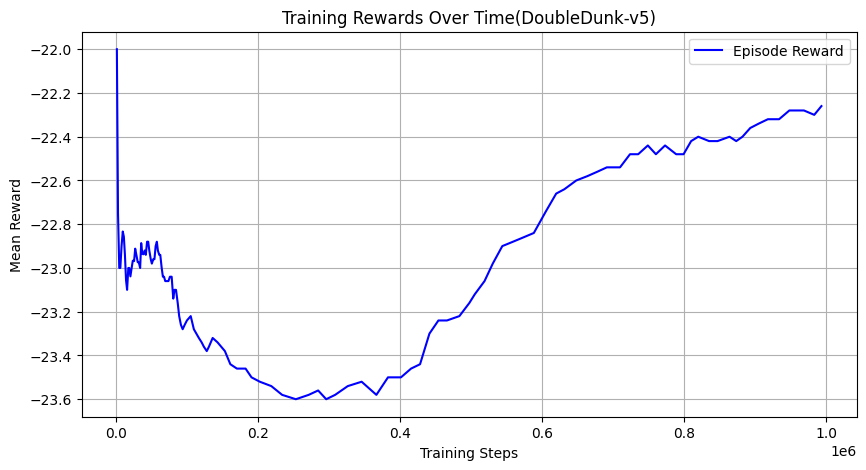

In [27]:
import matplotlib.pyplot as plt

# Plot of episode reward over training steps
plt.figure(figsize=(10, 5))
plt.plot(df["step"], df["reward"], label="Episode Reward", color="blue")
plt.xlabel("Training Steps")
plt.ylabel("Mean Reward")
plt.title("Training Rewards Over Time(DoubleDunk-v5)")
plt.savefig("training_rewards_doubledunk.png")
plt.legend()
plt.grid()
plt.show()

### Loading the Trained Model for Evaluation  
We load the trained model and verify if it was loaded correctly.

### 🎬 Running the Trained Agent  
- The agent interacts with the environment and plays the game.  
- **Gameplay is recorded as a video**.  
- Frame rate is adjusted to slow down gameplay for better visibility.

In [43]:
import gymnasium as gym
from stable_baselines3 import DQN
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.vec_env import VecFrameStack
import imageio
import numpy as np
import time

# Load the trained model
model_path = "/kaggle/working/dqn_doubledunk_model.zip"  # Path to your saved model
model = DQN.load(model_path)

# Verify model loading
print("Model loaded successfully!")
print("Model Policy:", model.policy)

# Set up the environment
env = make_atari_env("ALE/DoubleDunk-v5", n_envs=1, seed=42)
env = VecFrameStack(env, n_stack=4)  # Frame stacking for better performance

# Print action space for debugging
print("Action Space:", env.action_space)

# Initialize observation and variables
obs = env.reset()
frames = []  # To store frames for video recording
total_reward = 0  # Track the total reward (score)
episode = 1  # Track the number of episodes

# Frame rate control
target_fps = 60  # Atari games typically run at 60 FPS
frame_delay = 1.0 / target_fps  # Delay between frames in seconds

# Run the agent in the environment
max_steps = 10000  # Increase the number of steps for longer gameplay
for step in range(max_steps):
    action, _states = model.predict(obs, deterministic=False)  # Use non-deterministic mode
    obs, rewards, dones, info = env.step(action)  # Take a step in the environment
    total_reward += rewards[0]  # Accumulate the reward

    # Determine if you are on offense or defense
    if rewards[0] > 0:
        role = "Offense"
    else:
        role = "Defense"

    # Render the game as an RGB array and save the frame
    frame = env.render(mode="rgb_array")
    frames.append(frame)

    # a delay to control the frame rate
    time.sleep(frame_delay)

    # Checking episode has finished
    if dones.any():
        print(f"Episode {episode} finished! Total Reward: {total_reward}")
        obs = env.reset()  # Resetting the environment for the next episode
        print(f"Starting Episode {episode + 1}...")
        total_reward = 0  # Reset the total reward
        episode += 1  # Increment the episode counter

# Save the recorded frames as a video
video_path = "/kaggle/working/d_playback.mp4"  
imageio.mimsave(
    video_path,
    frames,
    fps=target_fps,  # Match the target frame rate
    quality=10,  # Maximum quality
    codec="libx264",  # High-quality codec
    pixelformat="yuv420p",  # Standard pixel format for compatibility
)

print(f"✅ Gameplay video saved to {video_path}")

env.close()

Model loaded successfully!
Model Policy: CnnPolicy(
  (q_net): QNetwork(
    (features_extractor): NatureCNN(
      (cnn): Sequential(
        (0): Conv2d(4, 32, kernel_size=(8, 8), stride=(4, 4))
        (1): ReLU()
        (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
        (3): ReLU()
        (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
        (5): ReLU()
        (6): Flatten(start_dim=1, end_dim=-1)
      )
      (linear): Sequential(
        (0): Linear(in_features=3136, out_features=512, bias=True)
        (1): ReLU()
      )
    )
    (q_net): Sequential(
      (0): Linear(in_features=512, out_features=18, bias=True)
    )
  )
  (q_net_target): QNetwork(
    (features_extractor): NatureCNN(
      (cnn): Sequential(
        (0): Conv2d(4, 32, kernel_size=(8, 8), stride=(4, 4))
        (1): ReLU()
        (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
        (3): ReLU()
        (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
        (5): ReLU(

### Conclusion  
- A **Deep Q-Network (DQN) agent** was trained on **Atari’s Double Dunk**.  
- The model **learned offensive and defensive strategies** over time.  
- The gameplay was **recorded and analyzed for performance improvements**.  